# Chapter 3 - Fixed Income Risk #
<br>
Copyright &copy; 2019 Kenneth Winston

![](wimpy.png)J. Wellington Wimpy, a character in 1930's _Popeye_ cartoons, is shown here delivering his assessment of the superiorty of present consumption over future money.
Mr. Wimpy was expressing a popular idea: an amount of money now (the price of a hamburger) is worth more than the same amount of money in the future, because one of the things you can do with money now is nothing. You can just wait for the future, and then do any of the things you could do with future money. So the set of things you can do with present money is a superset of the things you can do with money in the future, and therefore money in the future is worth less than money now.

Unfortunately popular ideas are not necessarily valid; this common-sense argument in favor of present money is wrong. It is possible that the purchasing power of money will increase over time so what you can buy with \\$100 today is less that what you will be able to buy with \\$100 a year from now. In that case you can do more with money in the future than you can do with money today. This is _deflation_, which is rare but does sometimes happen, usually during bad economic times. The code in the next cell retrieves data from FRED, the database maintained by the Federal Reserve of St. Louis (part of the US [central banking system](#central_banking)). It shows wholesale prices from 1914 to 1968.

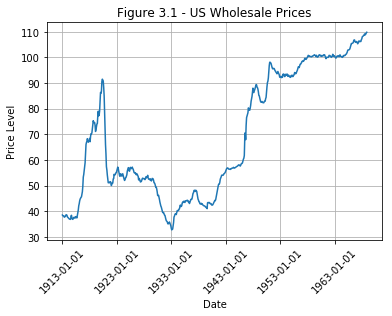

In [15]:
import qrbook_funcs as qf
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

#FRED code for wholesale price series 1914-1968
seriesnames=['M0448CUSM350NNBR']

dates,prices=qf.GetFREDMatrix(seriesnames)

## Configure the graph
x=np.arange(len(dates))
plt.plot(x,prices)
plt.title('Figure 3.1 - US Wholesale Prices')
plt.xlabel('Date')
plt.ylabel('Price Level')
plt.xticks(x[::120],dates[::120],rotation=45)
plt.grid(True)
plt.show();

## 3.1 Real, Inflation, and Nominal rates ##

In May of 1920, it cost \\$91.5 to buy the same things that would later (in February of 1933) cost only \$32.7. So if "now" was May of 1920, and "the future" was February of 1933, then "money in the future" was going to be worth almost three times as much as "money now." Your ability to buy things would have grown at a compound rate of about 8.4% a year during this period; that is, you would have been rewarded at that rate for being patient and postponing your purchases until later.

Mr. Wimpy's proposal of a hamburger today in exchange for payment in the future was probably made in the early 1930's and was a bad financial move in that deflationary period, since he would be borrowing the price of a hamburger today and paying it back with more valuable future money. Of course the actual implication of the cartoon was that Mr. Wimpy was never going to pay back the cost of the hamburger, so he wasn't particularly concerned with the time value of money.

The _inflation_ (or, if negative, _deflation_) rate is the annual rate of decay in the ability of money to purchase a constant basket of goods and services. We saw in Figure 3.1 a period where the inflation rate was about -8.4%, at least for wholesale goods.

Another important rate used to translate between money now and money in the future is the _default-free rate_, which is the rate you get paid to lend money with 100% chance of getting paid back fully and on time; so by definition there is no possibility of default (which is _not_ getting paid back fully and on time). Equivalently[$^1$](#three_footnotes), it is the rate you pay to borrow if you are a default-free borrower. This is the same concept as the _risk-free rate_ introduced in Chapter 2.

If you want to know today's value of a dollar received (say) one year in the future, consider making a one-year loan today of $\$\frac{1}{1+r}$ to a default-free borrower, where $r$ is the risk-free or default-free rate, e.g. 3% per year. You will receive a dollar one year from now. So the value of the dollar a year from now is $\$\frac{1}{1+r}$ today, e.g. about $\$.9709$ if the risk-free rate is 3%.

If you lend money with no adjustment for inflation, then the lending rate is called a _nominal rate_. There are arrangements where inflation adjustments are made: for example the US Treasury issues Treasury Inflation Protected Securities ("TIPS") that pay more when there is inflation and less when there isn't. Such securities are said to pay a _real rate_, i.e. a rate that reflects only the time value of money after keeping purchasing power constant.

The real rate plus the inflation rate equal the nominal rate[$^2$](#three_footnotes). If there were no inflation or deflation, then the do-more-with-money-now argument in the first paragraph of this chapter would seem to be compelling. So one would think that the real rate, which removes inflation, must always be positive.

Figure 3.2, generated by the code in the next cell, shows the yield to maturity on constant-maturity 5-year TIPS, i.e. the 5-year real rate:

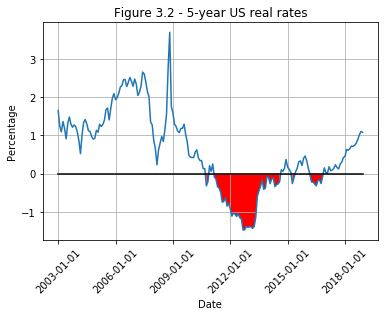

In [16]:
#FRED code for 5-year TIPS returns
seriesnames=['FII5']

dates,prices=qf.GetFREDMatrix(seriesnames)

#reformatting needed for fill_between
#prices is actually an array of singleton arrays,
#which fill_between doesn't like
p=[]
for i in range(len(prices)):
    z=prices[i][0]
    p.append(z)
    
## Configure the graph
x=np.arange(len(dates))
zeroline=np.zeros(len(dates))
plt.plot(x,p)
plt.plot(x,zeroline,color='black')
plt.fill_between(x,p,zeroline,where=zeroline >= p,facecolor='red')
plt.title('Figure 3.2 - 5-year US real rates')
plt.xlabel('Date')
plt.ylabel('Percentage')
plt.xticks(x[::36],dates[::36],rotation=45)
plt.grid(True)
plt.show();

## 3.1, cont'd: Real, Inflation and Nominal Rates ##

Figure 3.2 shows that 5-year real rates were continuously negative in the US from March 2011 through September 2014, and were also negative for shorter periods before and after that. At times, investors who were thinking of saving money (by making a loan to the US government for five years) estimated that they would lose over 1% a year in purchasing power by doing so. So unfortunately although the argument for positive real rates seems to be compelling, it isn't.

However an even more compelling argument can be made for positive **`nominal default-free`** rates. If the nominal rate is negative, you'll get back less money than you started with if you make a loan to a default-free borrower. The cure is obvious: don't lend. Just keep the money in a safe deposit box during the period you would have loaned it; then at least you'll have the same amount and not less in the future.

Thus, one might think, we should never see negative nominal rates because no one would lend at such rates.

The Swiss government is considered a default-free borrower. Figure 3.3 shows Swiss nominal rates starting in 2014:

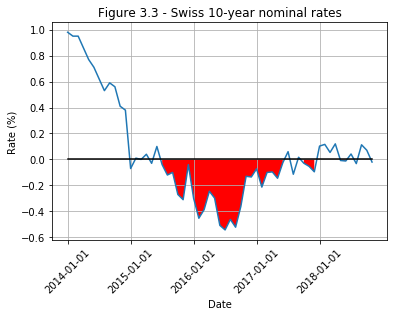

In [17]:
#FRED code for Swiss 10-year rates
seriesnames=['IRLTLT01CHM156N']

dates,rates=qf.GetFREDMatrix(seriesnames,startdate='2014-01-02')

#reformatting needed for fill_between
#prices is actually an array of singleton arrays,
#which fill_between doesn't like
r=[]
for i in range(len(rates)):
    z=rates[i][0]
    r.append(z)

## Configure the graph
x=np.arange(len(dates))
plt.plot(x,r)
#Put in a horizontal line at 0 and shade negative rates in red
zeroline=np.zeros(len(dates))
plt.plot(x,zeroline,color='black')
plt.fill_between(x,r,zeroline,where=zeroline >= r,facecolor='red')
#titles and labels
plt.title('Figure 3.3 - Swiss 10-year nominal rates')
plt.xlabel('Date')
plt.ylabel('Rate (%)')
plt.xticks(x[::12],dates[::12],rotation=45)
plt.grid(True)
plt.show();

## 3.2 Discounting ##
<a name="discounting"></a>

At times, investors gave the Swiss government CHF 100, knowing that in ten years they would only get back about CHF 95. Other countries (Germany and Japan for example) have also had negative nominal rates.

Why didn't these investors keep the money in a safe deposit box and get back CHF 100 in ten years rather than CHF 95? Some investors did do this, but it's hard to pay bills with money in a safe deposit box. Money that's part of the global electronic financial system &mdash; like Swiss government bonds held in a custodian bank &mdash; can be used easily by pushing a button to convert it to something else. Also, if you're an institution with hundreds of millions, or billions, of Swiss francs, safe deposit boxes aren't a practical option. And safe deposit boxes (or warehouses with armed guards, for larger investors) cost money too. Investors interested in finding a safe and convenient place for their Swiss francs were willing to pay the Swiss government a storage fee.

So inflation, real, and nominal rates can all be negative. Despite this, it is customary to speak of **`discounting`** future money to the present to reflect future money's supposedly diminished value compared to present money. In fact, inflation, real and nominal rates are usually positive so discounting is usually the right thing to do. The relatively few periods of negative rates can be handled with negative discounting, which is linguistically confusing but mathematically feasible.

The rate (usually per year) at which you discount future money to make it equal to present money is called the **`discount rate`**, and the associated multiplicative factor applied to sums of future money is called the **`discount factor`**. Usually the discount rate is the same as, or very close to, the default-free nominal rate.

In this chapter we're not going to differentiate between the components of the nominal rate; we'll essentially assume that real=nominal and we won't delve into the effects of inflation.

The rate at which future money is discounted is a description of one of the most fundamental human choices: consume now vs. save for later. Investors looking at negative real rates in the red sections of Figure 3.2 were seeing a discouraging environment for saving money for the future by loaning it to a default-free borrower (the US Treasury). That encouraged spending rather than saving, thereby speeding up the economy. High real rates encourage saving over spending.

<a><a name="central_banking"></a>
In most modern economies, a key agent trying to encourage the right level of spending vs. saving is a government institution called the **`central bank`**, which has the power to create or destroy money. Using this power, the central bank can force risk-free rates down using a variety of techniques: one technique is to drive the price of risk-free instruments up (thereby driving interest rates down) by buying these instruments using money it has created. Consumption then becomes relatively more attractive than saving and the economy is encouraged to speed up. In the other direction a central bank can drive rates up using such techniques in reverse, encouring less consumption so the economy slows down. In the US the central bank is called the [Federal Reserve](https://www.federalreserve.gov/aboutthefed.htm).

Curiously, investing at the risk-free rate is not risk-free. The next section explores this apparent paradox.

## 3.3 The risk in the risk-free rate ##
<a name="risk_in_rf_rate"></a>

Certain government ("sovereign") borrowers – among them the US Treasury, the Norwegian Ministry of Finance, the German Federal Ministry of Finance, the New Zealand Debt Management Office – are currently considered to pose no peril of default. If you lend these sovereigns money, short of an alien invasion you’ll get all the interest payments they promised you, when they promised them, and you’ll get all your original principal back when they said they would pay it back to you.

Thus when we want to find what the risk-free or default-free rate is, we usually look to the rate paid by a default-free sovereign. These rates are not all the same, since they are in different currencies. The US pays in dollars; Norway in krone; Germany in euros. That leads to additional complications. Let’s just stick with the US in dollars for now.

If you loan \\$1,000,000 to the US government at $7\frac{5}{8}\%$ per year for (say) 30 years, the usual convention is that you get sixty payments of \\$38,125 (one every six months for 30 years), and a repayment of the \\$1,000,000 loan amount (called "principal") in 30 years. To show how serious it was about repaying you, the United States Treasury used to give you a very impressive certificate like this:
![](treasurybond.jpg)

Generally a **`bond`** is a legally enforceable agreement between a borrower - in this case the US Treasury - and a lender. The pictured item is a "bearer bond," which indicates that the person who physically possesses the certificate gets the payments described above.

The practice of issuing physical certificates is now [archaic in the US](https://www.treasurydirect.gov/govt/reports/pd/pd_bearregsec.pdf), but when it was common, some of the certificates would have detachable “coupons” on them. The coupons would need to be clipped off and sent in to the issuer (the US Treasury in this case) each six months in order to get the payment, say the \\$38,125 semiannual payment that would actually be associated with a $7\frac{5}{8}\%$ bond with \\$1,000,000 principal.

Now US Treasury bonds are issued electronically. But the terminology persists - a "coupon" bond is one that pays regular, fixed interest payments in addition to a final repayment of principal. More precisely, such a bond is a _non-callable coupon bond_ or a _bullet bond_, meaning the issuer pays you back all the principal at the end (30 years in the example) and can't force you to take an early repayment of principal. A _callable_ bond gives the issuer the right to pay you back early if it so desires.

An even simpler arrangement is a _zero-coupon bond_ where there is only one payment at the end. For example, a 30-year $7\frac{5}{8}\%$ zero-coupon bond (sometimes called just a "zero") might start with you loaning the US Treasury $\frac{\$1,000,000}{1.07625^{30}}=\$110,308$ now. Then nothing would happen for 30 years. Then you would receive \$1,000,000 from the Treasury.
<a><a name="seven_percent_treasury"></a>
Suppose you have purchased the non-callable coupon bond described above (that is, you've loaned one million dollars to the US Treasury for 30 years) - except for ease of calculation let's assume the interest rate is a round 7%. Let's also suppose for ease of calculation that you just receive one annual interest payment of $70,000 rather than the usual semiannual payments.

Let's focus on the time one year after buying the bond, when you have just received an electronic credit of \\$70,000 in your bank account. Since exactly one year has passed, you now have a 29-year-maturity bond. You are looking at one of your financial news monitors and you see that the US Treasury has just issued a new 29-year bond. This is a thought experiment; the US Treasury only issues bonds at certain fixed maturities and 29 years isn't one of those maturities. The only real way to get a 29-year bond from the US Treasury is to buy a 30-year bond and wait one year. 

But in our thought experiment, the US Treasury has just issued a new 29-year bond with an 8% coupon. The new bond is called the **`on-the-run`** bond and the old bond is called an **`off-the-run`** or **`seasoned`** bond. Clearly you'd rather receive \\$80,000 a year from the on-the-run than \\$70,000 a year from the off-the-run for the next 29 years. They'll both pay the same principal at the end. So you call your bank or brokerage firm and tell them to sell the seasoned bond you own and buy the on-the-run.

Of course what you will find is that you will not get par (par=100 cents on the dollar) when you sell your seasoned bond. If you did, there would be an [arbitrage](#no_arbitrage); buy the on-the-run and sell the off-the-run and receive \\$10,000 a year for no investment. So you will have to sell your seasoned bond for a discount. The discount will (within transaction costs) equalize the values of the on-the-run and the off-the-run bonds so there is no arbitrage available.

There is a lot of so-called “fixed income mathematics” that can be brought to bear – there are in fact entire textbooks just on that subject. We’ll do just enough to explain what might happen to your 7% bond. But you can already see the risk in the “risk-free” rate: the value of one of the safest investments in the world has dropped due to a change in interest rates.

## 3.4 Basic Fixed Income Mathematics ##

A **`cash flow`** is just an exchange of money between parties. If you are one of the parties, then a positive cash flow to you means you receive money from someone else; a negative cash flow means you pay money to someone else. A generic financial arrangement contemplates one party receiving or paying future cash flows from/to another party. The cash flows are $c_1,c_2,\dots,c_n$ at times $t_1\leq t_2,\dots\leq t_n$ in the future.

So the simplified 7% Treasury non-call coupon bond had at its inception (time 0):
$$c_1=-1,000,000;c_2=\dots=c_{31}=70,000;c_{32}=1,000,000;$$
$$t_1=0;t_i=i-1 (i=2,\dots,31);t_{32}=30\label{eq:treasury_bullet_flows}\tag{3.1}$$

\eqref{eq:treasury_bullet_flows} describes a **`fixed income`** instrument; the cash flows are known constants at time zero. In full generality, any of these quantities (the cash flows $c_j$ and the times $t_k$) can be random variables. If the issuing entity is not default-free, then we might not get some of the interest payments, or might only get them partially, or might get them late. Similarly with the final repayment of principal. Or there could be a formula for the payments: they could depend on a benchmark whose future value is not known today – like LIBOR, the London Interbank Offered Rate (which is commonly used in the multi-trillion-dollar interest rate swap market[$^3$](#three_footnotes)). Or there could be optionality in the bond, where the issuer has the right to pay back early if interest rates go down and the issuer wants to retire high-rate debt and replace it with lower-rate debt. (This is called “prepayment risk.”) Some instruments contain options the other way, where you the lender get to put the bond back to the issuer if you wish.

In fact the term "fixed income" is ambiguous, since fixed income instruments don't have to be fixed (i.e. have nonstochastic cash flows) nor do they have to provide income. But generally the distinguishing characteristic of fixed income instruments is that their cash flows are contractually planned, while equity instruments do not have planned cash flows.

In most of this chapter we are just assuming away the possible stochastic nature of future cash flows. We are assuming that the $c_j$’s and $t_k$’s are constants known at time 0 when the bond is first issued.

But as we’ve pointed out, the bond is still not risk-free: money now is not the same as money later. The rate at which we discount future cash flows to bring their value down to an equivalent value if they were received today &mdash; the “discount rate” &mdash; depends on prevailing default-free interest rates at the time

So where's the risk? In a Knightian Risk sense, we know all of the outcomes (there is only one outcome: 30 payments of \\$70,000 every year, and one payment of \\$1,000,000 in 30 years) and all their probabilities (100%).

The risk is that _the risk-free rate changes_.

### 3.4.1 Generic Pricing Equation ###
<a><a name='generic_pricing_equation'></a>

There are many variants on discounting conventions. For now we will use $(1+r)^{-t}$ as the discount factor at annual rate $r$ over time $t$ denominated in years. Another convention is to discount cash flows by $(1+r/k)^{-kt}$ when flows are observed $k$ times a year. In the limit as $k\rightarrow \infty$, the discount factor becomes the continuous $exp(-rt)$; we will sometimes use the continuous factor when it is mathematically convenient. It's simply a change of variable &mdash; $r_{continuous}=k\ln(1+r_{discrete}/k)$; $r_{discrete}=k\bigl(\exp(r_{continuous}/k)-1\bigr)$.

The general expression for the price at time t of an instrument with the cash flows and timings specified in \eqref{eq:treasury_bullet_flows} is:
$$P_t = \sum_{i=m}^n \frac{c_i}{(1+r_i)^{t_i-t}}\label{eq:generic_pricing_equation}\tag{3.2}$$

Here m is the index that puts the past behind us at time t, i.e. $t_{m-1}<t$ but $t_m\geq t$. The $r_i$ are discount rates for the appropriate times - that is, the rates we think (at time t) we should discount a cash flow on this instrument that will occur $t_i-t$ years in the future.

We can look at \eqref{eq:generic_pricing_equation} as a pricing equation, where the $P_t$ on the left-hand-side is the only unknown. To start, we'll simplify by assuming a common known discount rate $r$, i.e. $r_i=r$ for all $i$. If we apply that to a simplified, generic \\$100 principal Treasury bond with regularly spaced payments of $c$ every year and a maturity $T$ years in the future, the expression becomes particularly simple. We can define $y=(1+r)^{-1}$ and rewrite \eqref{eq:generic_pricing_equation} as

$$P_t = \sum_{i=1}^T cy^i +100 y^T = cy\frac{1-y^T}{1-y}+100y^T\label{eq:generic_bullet}\tag{3.3}$$

As with many formulas in finance, we can look at \eqref{eq:generic_pricing_equation} backward. That is, we can start with an observed price $P_t$ and known cash flows $c_i$ and timings $t_i$, and solve for the discount factors $r_i$. If we do this with a single instrument, then there is only one equation so there can only be one unknown. In that case we assume again that all $r_i$ have a common value $r$, and solve for it. That $r$ is called the <a name="iror"></a>**`internal rate of return`** of the instrument (abbreviated "IRR" or "IROR") and sometimes the _yield_[$^4$](#three_footnotes) of the instrument.

We considered [above](#seven_percent_treasury) what could happen to a bond with a 7% coupon. We supposed that after a year there was a new on-the-run bond with a higher interest rate than the original 7%, causing the seasoned bond's price to go down. But if interest rates had gone down from 7%, the seasoned bond would have been worth more, since \\$70,000 payments every year would then be more attractive than the new bond's terms. The price of the 7% bond with 29 years left as a function of the new interest rate is shown in Figure 3.4 (which uses \eqref{eq:generic_bullet}), generated in the next cell:

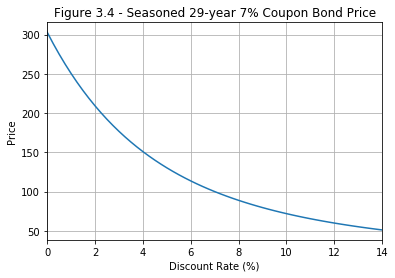

In [18]:
# Plot bond prices using Formula 3.3
# Function formula3p3 is in qrbook_funcs
x = np.arange(0, 14.25, .25)
coupon=7
years=29
y=[]
for rate in (x):
    y.append(qf.formula3p3(coupon,rate,years))
plt.plot(x, y)

## Configure the graph
str_title='Figure 3.4 - Seasoned %d'% years
str_title+='-year %d'% coupon
str_title+='% Coupon Bond Price'
plt.title(str_title)
plt.xlabel('Discount Rate (%)')
plt.ylabel('Price')
plt.xlim(0,14)
plt.grid(True)
plt.show();

### 3.4.2 Price Changes as Rates Change ###

For the 7% bond at its inception, we know $P_0=100$ because that’s what we paid for it (i.e. that’s what we loaned to the US Treasury), thereby establishing the market price. You can verify that putting $r=.07$ ($y=1/1.07$) in \eqref{eq:generic_bullet} with a c=7 coupon gives $P_0=100$.

Figure 3.4 applied \eqref{eq:generic_bullet} with c=7, but T=29 and with r’s varying along the X axis. At $r=8\%$, $P_1=\$88.84$. Of course if prevailing interest rates had dropped, we would have gained: for example if the new 29-year bond paid 6%, our seasoned 7% coupon bond would be worth $\$113.59$.

Note that as the prevailing interest rate changed by 1% up or down, the price of our old (“seasoned”) bond went down or up by somewhere around 12%. It is natural to want to find the relationship between changes in prevailing interest rates and the price of our bond – this could translate interest rate moves directly into price moves. If the discount rates in \eqref{eq:generic_pricing_equation} were the same for all cash flows ($r_i=r$ for all i), and the cash flows and times were known constants, we could expand around the current rate $r_0$ in a Taylor series, taking derivatives with respect to r:
$$P_t(r)=P_t(r_0)+P_t^{\prime}(r_0)(r-r_0)+P_t^{\prime\prime}(r_0)(r-r_0)^2+\dots\label{eq:generic_pricing_taylor}\tag{3.4}$$

Or, writing this in terms of percentage changes with obvious notation:
$$\frac{\Delta P_t(r)}{P_t(r_0)}=\frac{P_t^{\prime}(r_0)}{P_t(r_0)}(\Delta r)+\frac{P_t^{\prime\prime}(r_0)}{P_t(r_0)}(\Delta r)^2+\dots\label{eq:generic_taylor_percentage}\tag{3.6}$$

If there is a common discount rate $r$, then taking the first and second derivatives of \eqref{eq:generic_pricing_equation} with respect to $r$ and using $y=1/(1+r)$ gives:

$$P_t^{\prime} = -y\sum_{i=m}^n (t_i-t)c_i y^{t_i-t}\qquad P_t^{\prime\prime}=y^2 \sum_{i=m}^n (t_i-t)^2 c_i y^{t_i-t}-yP_t^{\prime}\label{eq:generic_taylor_flat_curve}\tag{3.7}$$

The first derivative shown in \eqref{eq:generic_taylor_flat_curve} is a multiple of the weighted average of the times at which we will receive the cash flows. That is, let $w_i=\frac{c_i y^{t_i-t}}{P_t}$; note $\sum w_i = 1$. Let $s=\frac{-1}{yP_t}$. Then $s\cdot P_t^{\prime}=\sum w_i(t_i-t)$.

The concept of finding the average time at which we will receive cash flows was introduced by [Frederick Macaulay in 1938](https://www.nber.org/chapters/c6342). Macaulay pointed out that maturity (for example, 29 years in Figure 3.3) was not necessarily the most important time-related characteristic of an instrument with known cash flows (that is, a bond). To take an extreme example, suppose a bond pays two cash flows: \\$99.99 in one year and \\$0.01 in thirty years. That bond is for all practical purposes a one-year bond, not a thirty-year bond. Macaulay introduced a new term:
>Let us use the word 'duration' to signify the essence of the time element in a loan. (p. 44)

Macaulay's suggestion was to use $-\frac{P_t^{\prime}}{yP_t}$ as the "essence" of the time element; today we call that _Macaulay duration_. Without the $y$ in the denominator (i.e. just $-\frac{P_t^{\prime}}{P_t}$), the expression is the _Modified duration_.

For our simplified Treasury bond example in \eqref{eq:generic_bullet}, the derivative has a closed form. For Macaulay duration before normalizing by dividing by price, we have (using $y=1/(1+r)$, $y^{\prime}=-y^2$):
$$\frac{-P_t^{\prime}}{y}=\frac{cy}{(1-y)^2}\bigl((1-y^T)-T(1-y)y^T\bigr) +100Ty^T\label{eq:generic_macaulay_flat}\tag{3.8}$$

When our original 7% bond was issued at par ($P_0=100$), we had $c=7$, $T=30$. The discount rate $r$ was 7% as established by this bond. Putting these numbers into the right-hand-side of \eqref{eq:generic_macaulay_flat} shows the Macaulay duration of the new 30-year bond is 13.3 years. This is dramatically shorter than the 30 year maturity. Generally a newly issued 30-year par bond has Macaulay durations that drop off rapidly as the coupon payment increases and more of the discounted cash flows are pushed closer to the present:

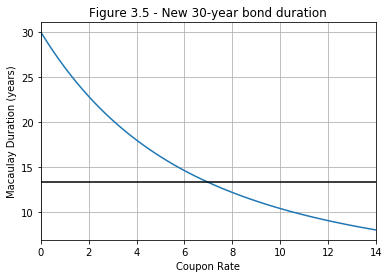

In [19]:
#Plot duration of a newly issued bullet bond
#with (coupon=discount rate)
x = np.arange(0, 14.25, .25)
years=30
y=[]
for rate in (x):
    coupon=rate
    y.append(qf.formula3p8(coupon,rate,years))
plt.plot(x, y)

#Show the duration of the 7% coupon bond for reference
coupon_7_dur=[qf.formula3p8(7.,7.,years)]*len(x)
plt.plot(x,coupon_7_dur,color='black')

## Configure the graph
str_title='Figure 3.5 - New %d'% years
str_title+='-year bond duration'
plt.title(str_title)
plt.xlabel('Coupon Rate')
plt.ylabel('Macaulay Duration (years)')
plt.xlim(0,14)
plt.grid(True)
plt.show()

### 3.4.3 Duration Calculations; Convexity ###

From Figure 3.5 we can see that the only coupon rate at which duration=maturity is zero; that is, only a zero-coupon bond has full duration. Intuitively that's because there's only one cash flow at T=maturity, which is 30 years in the figure. So in that case the only possible average time to maturity is T. You can also see this by dividing \eqref{eq:generic_macaulay_flat} by \eqref{eq:generic_bullet} with c=0.

Otherwise in Figure 3.5 durations are lower than 30 years as more of the weighted average cash flows come earlier as the coupons get higher.

The black line in Figure 3.5 shows the Macaulay duration of a bond maturing in 30 years, paying 7% coupons with a discount rate of 7%; it's $\frac{-P_t^{\prime}(7\%)}{yP_t(7\%)}\approx 13.3$ years. So in some sense, a bond maturing in 30 years and paying an annual 7% coupon acts like a zero coupon bond maturing in 13.3 years.

Let's just trace through the calculations to get a sense of how the prices move. Suppose there is an instantaneous rise of rates from 7% to 7.01%.

- Plugging in c=7, r=.0701, T=30 to \eqref{eq:generic_bullet} gives 99.87603. The difference between the original price of 100 ("par") and this new price is $\Delta P_t =-.124$. So the left-hand side of \eqref{eq:generic_taylor_percentage} is $\Delta P_t(7.01\%)/P_t(7\%)=\Delta P_t(7.01\%)/100=-.124\%$ for the 7% coupon bond.

- 13.3 (actually 13.27767) years is \eqref{eq:generic_macaulay_flat} divided by \eqref{eq:generic_bullet} with c=7, r=.07, T=30. For a zero-coupon bond with this maturity, its starting price is $\frac{100}{1.07^{13.27767}}=40.72413$. Recalculating the price at $r=7.01\%$, we get $\frac{100}{1.0701^{13.27767}}=40.67363$, a difference of $\Delta P_t=-.050501$. So for the zero-coupon bond, $\Delta P_t(7.01\%)/P_t(7\%)=-.050501/40.72413=-.124\%$.

In both cases we get a $-.124\%$ change in response to a $.01\%$ rise in rates. Note that the Macaulay duration divided by 1.07 is the Modified duration; 13.3 divided by 1.07 is 12.4. Multiplying (minus) that times $\Delta r=.01\%$ gives the $-.124\%$ changes we have seen in both bonds. That's because they have the same durations.

So the math works! To a first approximation, the 13.3-year zero is like the 30-year 7% coupon bond. So unless the prices were exactly as stated by the formulas above, there's a (sort-of) arbitrage where we could go long the 30-year 7% coupon bond and short \$100 worth of 13.3-year zero-coupon bonds, or the opposite. For small changes in rates the two of them should offset each other. But this is only a local arbitrage in the neighborhood of r=7%; for larger moves in rates they'll start to behave very differently.

For example, if the discount rate instantaneously goes to zero &mdash; which is not at all local to 7% &mdash; the price of the coupon bond will go to \\$310. (That's 30 cash flows of \\$7 plus \\$100 principal repayment, none of it discounted). But the price of the zero will go to \\$100, times $100/40.72413$ (i.e. \\$100 worth of zeroes at the original price). The difference is \\$64.45, or minus that if we established the trade in the other direction. So there is still quite a bit of risk in this trade and it's only a near-arbitrage locally.

We can get a better approximation of price changes by bringing in the second term of the Taylor series in \eqref{eq:generic_taylor_percentage}. This term $\frac{P_t^{\prime\prime}}{P_t}$ is called **`convexity`**. If you look closely at \eqref{eq:generic_taylor_flat_curve}, you’ll see that as long as the cash flows are positive constants, convexity is positive. This is good – it gives an upward curl to prices as interest rates change. We can see that upward curl in Figure 3.3; that's because the pricing function shown there is convex:
$$P_t(\lambda x + (1-\lambda)y)\leq \lambda P_t(x) + (1-\lambda)P_t(y)$$
where $P_t$ is given by \eqref{eq:generic_bullet}.

Numerically, at 7% the bond is at par ($P_t=100$); at 10% it it drops to $P_t=71.9$, while at 4% it rises to $P_t=151$. Both of these rates are 3% away from the current rate of 7%. The first-order approximation based on modified duration would indicate the price move should be 3*12.4=\\$37.2 – that is a drop to \\$62.8 (at 10%) and a rise to \\$137.2 (at 4%). In both cases we did better – that’s the upward "smile" of positive convexity.

Positive convexity is a bonus; if things change, you get better-than-linear results. In fact there's even a hedge fund called [Convexity Capital Management](https://www.convexitycapital.com/).

Negative convexity (concavity) can occur when the bondholder has given away options – the cash flows are still positive but they aren’t constant. For example, in many cases bonds issued by corporations are callable, meaning that the issuer can pay early. So if say the pharmaceutical company Johnson & Johnson issued a 30-year 7% coupon bond that was callable, you might buy it (i.e. lend them \\$100). But if a year later prevailing interest rates dropped to 5%, you might be contemplating how to spend your profits because \eqref{eq:generic_bullet} says the bond is now worth \\$130.28. But \eqref{eq:generic_bullet} (incorrectly in this case) assumes fixed cash flows; in fact at that point J&J would probably opt to give you back only your original \\$100 and borrow \\$100 from someone else at the new lower rate of 5%. The fact that J&J (rather than you) has the option to control the timing of payback is disadvantageous to you, since you are now stuck with the problem of reinvesting your \\$100 exactly at a time when interest rates are lower. If interest rates had gone higher, J&J would not have opted to pay you back early. Depending on how much optionality you the bondholder have given away, you could see a horrifying downward curl in the duration graph.

Taking the derivative of \eqref{eq:generic_macaulay_flat} (and rearranging the extra -1/y term) gives the un-normalized convexity. Note that the convexity of a zero is T(T+1).
$$P_t^{\prime\prime}=\frac{cy^3}{(1-y)^3}\bigl(2-(T+1)(T+2)y^T+2T(T+2)y^{T+1}-T(T+1)y^{T+2}\bigr)$$
$$+100T(T+1)y^{T+2}\label{eq:generic_convexity_flat}\tag{3.9}$$

Figure 3.6 shows first-order (duration only) and second-order (duration plus convexity) approximations to the simplified 30-year 7% coupon bond as rates change:

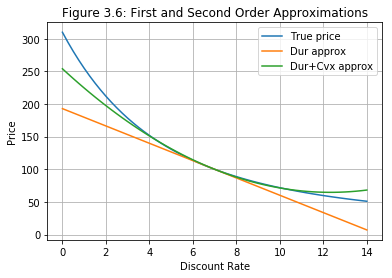

In [20]:
#Show a graph of true price of a 7% coupon, 30-year bond
#at different discount rates; compare with duration
#approximation and duration+convexity approximation
x = np.arange(0, 14.25, .25)
years=30
baserate=7
#Get the base price from formula 3.3
baseprice=qf.formula3p3(baserate,baserate,years)
#Get the base duration from formula 3.8
basedur=qf.formula3p8(baserate,baserate,years)
#Get the base convexity formula 3.9
basecvx=qf.formula3p9(baserate,baserate,years)
y, y1, y2=[], [], []
for rate in (x):
    #Full price computation from 3.3 at "rate"
    trueprice=qf.formula3p3(baserate,rate,years)
    #delta_rate is actually minus the change in rate
    delta_rate=baserate-rate
    #Multiply starting duration times (minus) delta-rate
    dur_times_delta=basedur*delta_rate
    duration_approximation=baseprice+dur_times_delta
    cvxgamma=.5*basecvx*delta_rate**2/100
    convexity_approximation=duration_approximation+cvxgamma
    y.append(trueprice)
    y1.append(duration_approximation)
    y2.append(convexity_approximation)

plt.plot(x, y, label='True price')
plt.plot(x, y1, label='Dur approx')
plt.plot(x, y2, label='Dur+Cvx approx')
## Configure the graph
plt.title('Figure 3.6: First and Second Order Approximations')
plt.xlabel('Discount Rate')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show();

### 3.4.4 Approximations and Basis Risk ###

Figure 3.6 shows the prices of the 30-year 7% coupon bond (y-axis) as the discount rate (x-axis) changes. The green line is the 2-term Taylor series from \eqref{eq:generic_pricing_taylor}; the blue line is the actual discounted set of cash flows from \eqref{eq:generic_bullet}; orange is the 1-term Taylor from \eqref{eq:generic_pricing_taylor}. The duration/convexity approximation works well in a much bigger neighborhood around 7% than the linear duration-only approximation.

So we've seen that a default-free bond’s duration is the main determinant of its behavior, and duration ties individual bonds to the behavior of the overall market (and the overall economy) through the prevailing level of interest rates. The idea of having a first-order approximation is not a bad one. It seems plausible that the major source of uncertainty in a bond’s price is an indicator of the relative values of consumption now (encouraged by low interest rates) versus consumption later (encouraged by high interest rates), as represented by the general level of interest rates.

If life were this simple, the financial industry would not need legions of "quants" (quantitative analysts) to figure things out. There are two sources of divergence from first-order approximations. One is just having more terms in the Taylor series, which we’ve seen is helpful. But there are diminishing returns to the effort of expanding the Taylor series out further and further. For most practical purposes, two is all you need.

A bigger source of uncertainty not explained by the duration relationship is what’s sometimes called “basis risk.” This is simply the shorthand for the fact that sources of risk are multidimensional. We've assumed away most complications in our analysis so far, but in fact many factors can arise that affect the variables in the fundamental instrument description \eqref{eq:treasury_bullet_flows}.

Even bonds issued by the same issuer - say the US Treasury - can have different behaviors. For example if you look closely at the language on the bond pictured [above](#risk_in_rf_rate), you will see that it had a five-year cleanup period at the end of its life (from 2002 to 2007) when it was callable by the US Treasury. As we've noted above, that can cause negative, or at least less positive, convexity. That in turn will cause the price, duration and convexity to differ from the simple formulas.

We noted above that there are on-the-run (newly issued) and off-the-run (seasoned) bonds. Generally there is a premium for on-the-run bonds; they get more attention and therefore are easier to buy and sell than equivalent off-the-run bonds.

Those are a few reasons why even very similar bonds from the same issuer can have prices that differ from the formulas. When we bring in other issuers - even issuers considered default-free - even more factors cause differences.

A very common method in fixed income risk management is to look at a “portfolio duration,” which is the weighted average of the durations of the individual bonds in the portfolio. Unfortunately this first-order figure can be confusing, if not downright misleading. Other sources of risk in a portfolio will have relationships with the discount rate used to find duration. For example, during bad economic times the premium for on-the-run bonds generally increases because there's an even bigger desire for liquidity. At the same time, interest rates might be falling because the central bank might be trying to simulate economic activity by lowering interest rates. Thus portfolios of on-the-run bonds will react differently to interest rate drops than portfolios of off-the-run bonds, even if they have the same durations. In other economic environments, however, the relationships might shift. We will see in later chapters how to take into account multidimensional sources of risk.

## 3.5 Yield Curves ##

Prevailing interest rates paid by certain issuers or groups of issuers such as
- the [United States Treasury](https://www.treasurydirect.gov/instit/marketables/tbonds/tbonds.htm)
- US "GSE's" (Government-Sponsored Enterprises) like [FNMA (Federal National Mortgage Association)](http://www.fanniemae.com/portal/funding-the-market/debt/index.html)
- the [Japanese government](https://www.mof.go.jp/english/jgbs/)
- the [German government](https://www.deutsche-finanzagentur.de/en/institutional-investors/federal-securities/)
- the [Chinese government](https://www.chinabond.com.cn/d2s/engindex.html) inside mainland China (“onshore”)
- the Chinese government in Hong Kong (["offshore bonds"](https://www.bochk.com/en/investment/debt/bondindex.html), known as ["Dim Sum" bonds](https://www.nasdaq.com/investing/glossary/d/dim-sum-bond))
- [Investment grade European corporations](https://us.spindices.com/indices/fixed-income/sp-eurozone-investment-grade-corporate-bond-index)
- very shaky [(CCC-rated) companies](https://us.spindices.com/indices/fixed-income/sp-500-high-yield-corporate-bond-ccc-index) with a high chance of bankruptcy
- [State and local governments in the US](https://us.spindices.com/indices/fixed-income/sp-municipal-bond-index)
- [Securitized credit card receivables](https://philadelphiafed.org/-/media/consumer-finance-institute/payment-cards-center/events/workshops/2002/CreditCardSecuritization_012002.pdf)
- Bonds with payoffs related to the intensity of hurricanes in Florida ([“cat bonds,”](https://www.naic.org/cipr_topics/topic_insurance_linked_securities.htm) where “cat” means “catastrophe”)...

are gathered regularly and are presented in what are called “yield curves.”

For simplicity in our previous analysis, we assumed that $r=r_i$ for all i; that is, the discount rate was the same at all maturities. (This is called a “flat curve.”) That’s rarely true.

A yield curve has time to maturity on the x axis, and an interest rate on the y axis. Then next code cell generates Figure 3.7, which graphs the US Treasury yield curve at the ends of the years shown. <span style="color:green">**(Why is the short end of the 2017 curve higher than the others?)**</span>

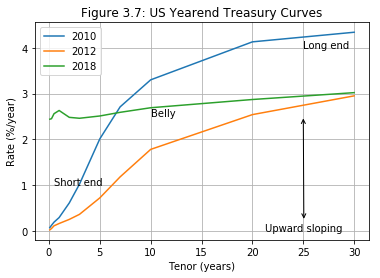

In [21]:
import pandas as pd
#Plot the 2010, 2012, and most recent yearend
#US Treasury curves
seriesnames=['DGS1MO','DGS3MO','DGS6MO','DGS1',
             'DGS2','DGS3','DGS5','DGS7',
             'DGS10','DGS20','DGS30']
cdates,ratematrix=qf.GetFREDMatrix(seriesnames)

#Form the list of curve dates to display
displaydates=['2010-12-31','2012-12-31']
displaydates.append(qf.LastYearEnd())
tenors=qf.TenorsFromNames(seriesnames)

#Plot the three lines
for i in range(3):
    year=displaydates[i][:4]
    plt.plot(tenors,
        ratematrix[cdates.index(displaydates[i])],
        label=year)

## Configure the graph
plt.title('Figure 3.7: US Yearend Treasury Curves')
plt.xlabel('Tenor (years)')
plt.ylabel('Rate (%/year)')
plt.legend()
plt.grid(True)
plt.annotate('Upward sloping', xy=(25, 2.5), xytext=(21.25, 0),
            arrowprops=dict(arrowstyle='<->',
                    facecolor='black'))
plt.text(.5, 1, 'Short end')
plt.text(10, 2.5, 'Belly')
plt.text(25, 4, 'Long end')
plt.show;

### 3.5.1 Features of Yield Curves ###

Figure 3.7 shows that rates for _short-term loans_ (often considered to be less than two years[$^5$](#three_footnotes)) are called the _short end_ of the curve. The US Treasury calls its borrowings in this maturity range [bills](https://www.treasurydirect.gov/indiv/products/prod_tbills_glance.htm). The middle (or _belly_) of the yield curve (which we consider to be 2 to 15 years) comprises rates for _intermediate-term loans_, which the US Treasury calls [notes](https://www.treasurydirect.gov/indiv/products/prod_tnotes_glance.htm). _Long-term loans_ (which we consider to be 15 years or more) are in the _long end_ of the curve; the US Treasury calls these [bonds](https://www.treasurydirect.gov/indiv/products/prod_tbonds_glance.htm). In previous sections we have used the term "bond" to generally refer to a lending agreement, but these terms are more precise.

The 2010 and 2012 curves in Figure 3.7 are atypical in that short-term interest rates on the left side of the curve are practically zero. This was a result of the Global Financial Crisis ("GFC") of 2007-2009, which saw economic activity slow dramatically. As we've noted above, the central bank (in the US, the Federal Reserve or "Fed") can encourage present economic activity by forcing risk-free rates lower. From December 2008 to December 2015, the Fed pushed short-term rates to the lowest possible value (.25%). In December 2015 the economy was deemed healthy enough so that maximal encouragement of current spending was no longer needed, and the Fed began raising its targets for short-term rates.

The US Treasury curves in Figure 3.7 were upward-sloping – the longer the maturity, the higher the yield. That is generally an indicator that the bond market thinks there will be economic growth, or at least inflation, in the future. In late 2010, the 10 year minus 1 year slope was near the all-time steeps[$^6$](#three_footnotes), indicating a bond market belief that the economic future will be more robust, or at least more inflationary, than the present.

Figure 3.7 just used straight-line interpolation between data points supplied by the Treasury, but the Treasury itself uses a smoothing algorithm so that there is a continuous yield function $y(m)$, where m is the maturity. The [US Treasury says](https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/yieldmethod.aspx):
>The Treasury's yield curve is derived using a quasi-cubic hermite spline function... Because the on-the-run securities typically trade close to par, those securities are designated as the knot points in the quasi-cubic hermite spline algorithm and the resulting yield curve is considered a par curve.

As of October, 2018 there were 58 US Treasury bills, 324 Treasury notes, and 165 US Treasury bonds [classified as "marketable" outstanding](https://www.treasurydirect.gov/govt/reports/pd/mspd/mspd.htm). While this is a large number, many of these issues are seasoned; which the Treasury prefers not to use. So, for example, there might not be any actual 15-year maturity Treasury bond whose observable price would determine a 15-year yield for the Treasury's curve. Instead, there might be 10-year and a 30-year on-the-run issues to observe, and the Treasury would use a spline algorithm fitted to the 10- and 30-year rates to infer a 15-year rate.

<a name="zero_curves_and_par_curves"></a>
### 3.5.2 Zero Curves and Par Curves ###

To explain the reference to a _par curve_ in the quote above from the US Treasury, we'll start with the far more sensible concept of a **`zero curve`**, sometimes called a **`spot curve`**. Suppose there were 60 zero-coupon bonds issued by the US Treasury, maturing 6 months from now, one year from now, … 30 years from now. In that case we could take the 60 observations $r_t=(100/P_t)^{1/t}-1$, where $P_t$ is the current price of the zero that will pay \\$100, t years in the future. Each $r_t$ would be the market's discount rate for cash flows scheduled to occur at time t in the future, every six months up to 30 years from now. A smoothing algorithm could be used to fill in the curve between these 60 observations.

Such a spot curve could be used as a discount curve, and it would have the power of arbitrage behind it. If some other default-free instrument had US dollar cash flows that were not being discounted at rates $r_t$, then an arbitrage portfolio could be formed. For example if the instrument was too cheap according to the zero curve, then the arbitrage would buy the instrument and sell zero-coupon-bonds in amounts matching the instrument's cash flows and flow times. This would be (to within the practical limits of arbitrage, including costs and other frictions) a riskless arbitrage.

Perhaps fortunately for the US taxpayer, the US Treasury does not borrow so often that there are always 60 perfectly spaced zero-coupon bonds to observe over the next 30 years. Sometimes “strips” can be used – a dealer (or sometimes [the Treasury itself](https://www.treasurydirect.gov/instit/marketables/strips/strips.htm)) buys a coupon Treasury bond and then issues two certificates based on that bond: a “PO” (principal only) certificate that entitles you to just the final principal repayment and an “IO” (interest only) certificate that entitles you to just the coupon payments. The PO is equivalent to a zero-coupon bond and its traded price can be used to get zero rates.

However even after taking into account these synthetic instruments, zeroes are not as heavily traded or as widely available in different maturities as are coupon bonds. So a process called _bootstrapping_ is used to infer a zero curve from yields ([internal rates of return](#iror)) on coupon-paying bonds. The idea is straightforward: We start with a short-maturity coupon bond, one that has already paid its last coupon and thus is (from now on) actually a zero. Let’s say that’s a one-month bond priced at $P_1$. Then the one-month point on the bootstrapped curve is $r_1=(100/P_1)^{12}-1$.

We then look at the next observable coupon-paying bond. Let’s say for simplicity it’s a two-month bond that is paying coupons monthly. So there’s a coupon c one month from now, and another coupon c (along with a principal repayment of \\$100) two months from now.

This two-month bond has some observable price $P_2$ in the market. So we can use the generic pricing equation \eqref{eq:generic_pricing_equation} backward:
$$r_2=\bigl(\frac{100+c}{P_2-\frac{c}{(1+r_1)^{1/12}}}\bigr)^{12/2}-1\label{eq:generic_twostep_bootstrap}\tag{3.10}$$

Everything on the RHS of \eqref{eq:generic_twostep_bootstrap} is known, so we have solved for the rate $r_2$ that is the pure discount rate for cash flows occurring at 2 months and at no other time. Continuing this process we can bootstrap an entire spot curve. The cash flows don’t usually line up as nicely as in our example, but with smooth interpolation techniques we can get a reasonable facsimile.

The assumption behind an [internal rate of return](#iror) calculation such as \eqref{eq:generic_bullet} is that all cash flows associated with an instrument are discounted at the same rate. That would mean that cash received 10 years from now as a coupon payment on a 20-year bond gets discounted differently than cash received 10 years from now as the final return of principal on a 10-year bond. That could lead to arbitrages.

The bootstrap process - or direct observation of zeroes, if available - forms a more consistent zero curve. Each time period gets its own discount rate.

The _par curve_ is probably a legacy of pre-computer days[$^7$](#three_footnotes). When a bond is priced at par (price=principal amount), then its coupon rate is the same as its internal rate of return. Today it's trivial to compute an IRR with an iterative process, but before computers, it wasn't. So if there are a representative set of bonds priced at (or close to) par, a yield curve can be constructed just by observing their coupons. While such par curves are easy to construct, they suffer from the inconsistency in IRR's pointed out above.

Despite this inconsistency, par curves are still widely used, probably due to historical inertia. To make up for the dearth of bonds pricing at par, a process is used to create virtual coupon-paying bonds using a zero curve. For every time T (say every six months for 30 years) we construct a virtual coupon-paying bond, one that pays a constant coupon $c_T/2$ every six months for T years, with a final payment of 100 at maturity at T. The cash flows on this bond are discounted to the present using the (bootstrapped) zero curve. Then the coupon rate $c_T$ is iteratively adjusted until the price of the bond is par (\\$100). The rates $c_T$ form the par curve.

If a real coupon bond whose market price was close to \\$100 was used in the bootstrapping process to form the zero curve, then &mdash; assuming the process didn't interpolate too much &mdash; the real bond's coupon rate should be consistent with the virtual par curve's rates. Virtual par curves are often used as a reporting convention because many participants in the fixed income markets are used to thinking in par curve terms.

### 3.5.3 Types of Yield Curves ###

So there are actually many kinds of interest rate curves in common use:

- Yield curves obtained from [internal rates of return](#iror) required to match market-observed prices of bonds, usually coupon-paying;
- Zero or spot curves of yields of zero-coupon bonds, or of artificial zero-coupon bonds created from the bootstrap process shown above;
- Discount curves – the rates used to discount cash flows at various times in the future to bring them back to the present. Usually these are the same as zero or spot rates;
- Forward curves – the future rates implied by today’s curve; these will be discussed [below](#implied_forward_curves).
- Short rate curves – instantaneous forward rates; i.e. the 5-year point on the short rate curve is the annualized rate from 5 years to 5 years plus one microsecond from now; these will be discussed [below](#term_structure_models).
- Par curves – coupon rates required to make a hypothetical coupon-paying bond price at par (100) if each of its cash flows is discounted at the rates implied by a zero curve. A par curve can also be a yield curve (IRRs formed from observed prices) of bonds pricing close to par – that’s actually what the US Treasury uses.

Current fixed income analytic software often inputs a par curve but then bootstraps it internally to a spot curve before using the rates to discount cash flows. This is strange since the par curve had to be constructed from the spot curve in the first place. Further, durations are sometimes defined with respect to a par curve, leading to discrepancies, like 25-year maturity bonds with 25.5-year durations.

### 3.5.4 Yield Curves and Economic Conditions ###

The rate curves in Figure 3.7 were all upward-sloping &mdash; longer maturities meant higher rates. (I.e. if $y(m)$ is the function giving the yield for maturity m in one of these curves, then $y^{\prime}(m)\geq 0$.) But this isn't always true. Figure 3.8 shows the US Treasury yield curve on January 2, 2001. 

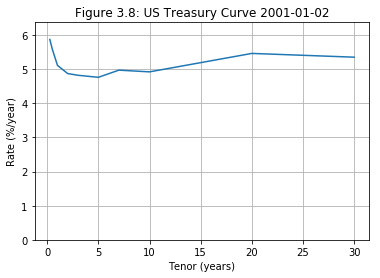

In [22]:
#Show the inverted Treasury curve from 2001-01-02

targetdate='2001-01-02'
#Note no one-month rate on this date
snames_target=['DGS3MO','DGS6MO','DGS1',
             'DGS2','DGS3','DGS5','DGS7',
             'DGS10','DGS20','DGS30']
dates_target,ratematrix_target=qf.GetFREDMatrix(snames_target,startdate=targetdate,enddate=targetdate)

plt.plot(qf.TenorsFromNames(snames_target), ratematrix_target[0])
## Configure the graph
plt.title('Figure 3.8: US Treasury Curve '+targetdate)
plt.ylim(0,max([x for x in ratematrix_target[0] if pd.notna(x)])+.5)
plt.xlabel('Tenor (years)')
plt.ylabel('Rate (%/year)')
plt.grid(True)
plt.show;

### 3.5.4, cont'd Yield Curves and Economic Conditions ###

This curve is downward-sloping ("inverted") from 0-5 years and then mostly flat to about 15 years. An inverted curve generally means that the bond market is gloomy about the future. Historically the bond market has been reasonably accurate in predicting the economic future, i.e. inverted curves are pretty good predictors of recessions. But there is less to this than meets the eye. When the central bank feels the economy is getting overheated it may rapidly raise short-term rates to slow it down; this can cause an inverted curve but can also be a harbinger of a turn in the economic cycle, leading to a recession.

Figure 3.9 shows "steepness," which is defined here as the difference between the 10-year Treasury rate and the 1-year Treasury rate. Of course there are many parts of the curve that can be examined for slope, but this is a fairly common one.

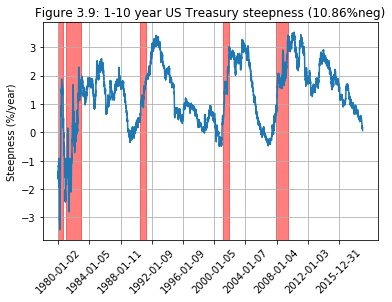

In [23]:
#Plot the 1Y to 10Y steepness
#Get index into ratematrix that was obtained in previous code segment
index_1Y=3
index_10Y=8
start=cdates.index('1980-01-02')
n=len(cdates)
steeps=[ratematrix[i][index_10Y]-ratematrix[i][index_1Y] \
        for i in range(start,n)]

#Remove NaN's from data
steeps_dates=[]
steeps_clean=[]
num_neg=0
for i in range(start,n):
    if not np.isnan(steeps[i-start]):
        steeps_dates.append(cdates[i])
        steeps_clean.append(steeps[i-start])
        if steeps[i-start]<0:
            num_neg+=1
            
#Compute percentage negative
n_clean=len(steeps_clean)
pct_neg_str="%.2f"%float(100*num_neg/n_clean)

#Make the graph        
x=np.arange(n_clean)
plt.plot(x,steeps_clean)

#Mark recessions (http://www.nber.org/cycles/cyclesmain.html) in red
starts=['1980-01-02','1981-01-02','1990-07-02','2001-03-01','2007-12-03']
finishes=['1980-07-31','1982-11-30','1991-03-28','2001-11-30','2009-06-30']
for idx in range(len(starts)):
    start=steeps_dates.index(starts[idx])
    finish=steeps_dates.index(finishes[idx])
    plt.axvspan(start, finish, alpha=0.5, color='red')
## Configure the graph
plt.title('Figure 3.9: 1-10 year US Treasury steepness ('+pct_neg_str+'%neg)')
plt.xticks(x[::1000],steeps_dates[::1000],rotation=45)
plt.ylabel('Steepness (%/year)')
plt.grid(True)
plt.show;

### 3.5.5 Rolldown and Key Rate Durations ###
<a name='rolldown_key_rates'></a>

Figure 3.9 shows that since 1980, the US rate curve was usually upward-sloping (10 year rate greater than 1 year rate), but about 11% of the time it was not. The red shaded areas are US economic recessions according to the [National Bureau of Economic Research](http://www.nber.org/cycles/cyclesmain.html). As pointed out above, the recessions have been reliably preceded by the steepness dipping below zero, i.e. inverted curves.

Fortunately US rate curves have been upward-sloping about 89% of the time. Upward slope allows a nice feature called _rolldown_. If you buy a 10-year bond and - as is usually the case with an upward-sloping curve - 7-year rates are lower than 10-year rates, then what happens in 3 years? While of course lots of things could happen to change the yield curve in those three years, the current expectation is that your bond will be discounted at a lower rate than it was when you bought it. Since lower discount rates mean higher prices, the tendency will be for the price of your bond to rise.

There are different conventions for quantifying the rolldown effect, but one common metric is $y^{\prime}(T)\cdot P\cdot T$, where $y^{\prime}$ is the slope of the yield curve at the bond's time to maturity $T$, and $P$ is the bond's price. For example consider the year-end 2012 curve in Figure 3.7. The 10-year rate was 1.78% and the 7-year rate was 1.18%. Using simple linear interpolation, the slope at 10 years was $(1.78\%-1.18\%)/3=20$bps per year. (A basis point or "bp" is one one-hundredth of a percent). If a 10-year bond was priced at \\$90, then its annual rolldown would be 20 bps/year times \\$90 times 10 years, or \\$1.80. Of course as Figure 3.7 shows, the curve is constantly undergoing reshaping, so rolldown is only an instantaneous expectation.

So we have seen so far two big economic risk factors that are reflected in the shape of the yield curve:

- The overall level of the yield curve is an indicator of the economy’s tradeoff between present consumption and future consumption; and
- The slope of the yield curve is an indicator of an expectation of growth or slowdown in the future.

We tried to quantify the risk that variations in the present consumption/future consumption factor (as reflected in the overall level of rates) might pose to a bond’s price by computing the bond’s duration. We could take that process further and use _key rate durations_. A key rate duration is a sensitivity to the change in a particular part of the yield curve. So instead of having to assume $r_i=r$ for all i in \eqref{eq:generic_pricing_equation}, we could just take derivatives of price with respect to each $r_i$ separately. A bond with no cash flows at 7 years would have zero 7-year key rate duration, but if it had cash flows at 8 years then there would be some response to changes in the 8-year rate and the 8-year key rate duration would be nonzero.

How much precision in key rate durations is too much? The two big economic risk factors noted above cause at least two degrees of freedom in movements of yield curves. On the other hand if we take 30 key rate durations from 30 points on the yield curve, we might be trying to squeeze too much information out of the yield curve.

In the early 1990s, Robert Litterman and Jose Scheinkman published an article [“Common factors affecting bond returns.”](http://www.princeton.edu/~joses/pp/Common_F.pdf) They pointed out that duration and convexity exposures assume a single, constant interest rate and seeks to determine a bond’s sensitivity to it. However they note that rates at different maturities can move differently, perhaps even in opposite directions.

L&S note that there appear to be the three main determinants of the shape of the yield curve noted above:
-Level: this is the general level of interest rates, where all rates go up or down by the same amount.
-Steepness or slope: this is how rapidly the yield curve goes up (or down) from short rates to longer rates.
-Curvature or twist: This is a butterfly shape that occurs between short, medium, and long-term rates.

It is possible to take a time series of interest rates at different maturities and form a covariance matrix between them. Principal components analysis (section 5.3 below) can then be applied. For most yield curves (US Treasury, other sovereigns, other types of bonds), the first three components explain over 90% of the variation in the covariance matrix. The eigenvectors associated with the those largest eigenvalues have weights that agree with the level, steepness, curvature interpretation. The eigenvalues are far larger than random matrix theory would suggest.

The following data are taken from a 1997 article by [J. Frye](https://pdfs.semanticscholar.org/c0ca/bab4aebf9d04e58a3084e4f35ea4d57045aa.pdf) and are based on US Treasury rates for 1543 days from 1989 and 1995. We can clearly see a roughly straight line for PC1; an increasing line for PC2; and a twist for PC3. These are consistent with the intuitive explanations.

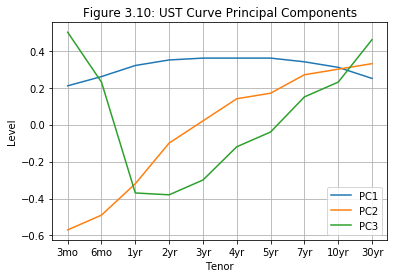

In [24]:
#Plot first 3 principal components from Table 2 in
#https://pdfs.semanticscholar.org/c0ca/bab4aebf9d04e58a3084e4f35ea4d57045aa.pdf
tenornames=['3mo','6mo','1yr','2yr','3yr',
        '4yr','5yr','7yr','10yr','30yr']
tenornumbers=range(len(tenornames))
pc1=[0.21,0.26,0.32,0.35,0.36,
     0.36,0.36,0.34,0.31,0.25]
pc2=[-0.57,-0.49,-0.32,-0.1,0.02,
     0.14,0.17,0.27,0.3,0.33]
pc3=[0.5,0.23,-0.37,-0.38,-0.3,
     -0.12,-0.04,0.15,0.23,0.46]
plt.plot(tenornumbers, pc1, label='PC1')
plt.plot(tenornumbers, pc2, label='PC2')
plt.plot(tenornumbers, pc3, label='PC3')

## Configure the graph
plt.title('Figure 3.10: UST Curve Principal Components')
plt.xlabel('Tenor')
plt.ylabel('Level')
plt.legend()
plt.xticks(tenornumbers, tenornames)
plt.grid(True)
plt.show;

### 3.5.6 Interpolation and Smoothing Techniques ###

We’ve noted that smoothing techniques are used to create continuous curves. The US Treasury uses a quasi-cubic hermite spline curve. This matches beginning and end points and tangents at each knot point; the knot points are mainly those maturities where the Treasury was able to observe an on-the-run bond's price.

Another approach that is less highly fitted was pioneered by [Nelson and Siegel in 1987](https://www.jstor.org/stable/2352957). If r(0,f) is the smoothed yield (r=rate) for a zero-coupon bond starting now (time t=0) and going to some final maturity time t=f in the future, then Nelson-Siegel’s smoothed version of r(0,f) is:
$$r(0,f)=\beta_0+\beta_1\frac{\tau}{f}\bigl(1-exp(-\frac{f}{\tau})\bigr)+
\beta_2\frac{\tau}{f}\bigl(1-exp(-\frac{f}{\tau})(1+\frac{f}{\tau})\bigr)\label{eq:nelson_siegel}\tag{3.14}$$

While later examples of this class of smoothing techniques use more parameters, the Nelson-Siegel version uses the four parameters $\beta_0, \beta_1, \beta_2,$ and $\tau$, which can be fitted to observed input yields $y_1,\dots,y_k$ at maturity times $t_1,\dots,t_k$ to provide in most cases a good fit. These parameters have straightforward intuitive explanations:

- As $f\rightarrow\infty$, all terms except for $\beta_0$ approach zero, so $\beta_0$ is the yield level at the long end of the curve.
- As $f\rightarrow 0$, r(0,f) approaches $\beta_0+\beta_1$, so $\beta_0$ is the opposite of the slope between the yield at the short end of the curve and the yield at the long end of the curve.
- $\beta_2$ determines yield levels in the middle (“belly”) of the curve.
- $\tau$ controls how fast the levels transition from short end to belly to long end.

[Diebold, F.X. and Li, C.](https://www.nber.org/papers/w10048) used a Nelson-Siegel framework to predict future US Treasury rates. They noted that the limited number of parameters in the Nelson-Siegel approach was similar in spirit to the three usual factors (level, slope, curvature), for example in Litterman-Scheinkman. Using time series techniques, Diebold and Li fitted time-varying parameters to the Nelson-Siegel model and showed that six-month-ahead and one-year-ahead forecasts of interest rates were generally better than competing forecasing methods.

<a name='implied_forward_curves'></a>
## 3.6 Implied Forward Curves ##

Fixed income investors are concerned about the possible ranges of future interest rates. We've seen that interest rates at different maturities are neither all the same nor all different. Our original simplifying assumption that $r_i=r$ for all i in \eqref{eq:generic_pricing_equation} was good to gain initial intuition, but not realistic: 30-year interest rates are clearly quite different from 1-year interest rates.

On the other hand, yield curves are not just databases listing observations of unrelated instruments. We've seen that there are only about three significant principal components in a covariance matrix of interest rates. But as Figure 3.5 showed, the shape of the yield curve - not to mention its average level - can be different at different times.

In order to have a good model of the probability distribution of future prices of fixed income instruments, we need to have a good model of the probability distributions of yield curves as they evolve into the future.

To find such models, we'll start by introducing the notation $r(s,f)$ for the yield on a zero-coupon bond starting at time $s$ in the future (or present if $s=0$) and maturing at time $f\geq s$. Rates that look like $r(0,f)$ are called _spot rates_ – they are known now or “on the spot.” (This is confusing since as we saw [above](#zero_curves_and_par_curves), a “spot curve” is the same as a zero curve, so the word “spot” has two different meanings that have to be resolved by context.) Rates that look like $r(s,f)$ where $s>0$ are called _forward rates_ and are not known today.

Forward rates are in full generality stochastic. However, we can find the forward rates that are implied from the current yield curve – that, is, the current yield curve contains a prediction of what the yield curve will be in the future. This prediction is similar to the [risk-neutral market expectation of the price of MidCo](#stochastic_discount_factors); it contains a mash-up of expected values and risk compensation.

We noted before that there are different discounting conventions. For the rest of this chapter, we’ll use the continuous discount $exp(-rt)$ rather than the discrete $(1+r)^{-t}$. Since rates are generally small numbers like 5%, this usually doesn’t make a material difference; or we could just change the rate so that the two were equivalent.

To compute the implied forward curve, let $Z(0,f)=exp(-r(0,f)\cdot f)$ be the cost of a zero-coupon bond bought now and maturing at \\$1 at time f in the future. Let $Z(s,f)$ be the (currently unknown) cost of a zero bought at time $s$ in the future and maturing at \\$1 at time f in the future – its cost will be $exp(-r(s,f)\cdot (f-s))$.

Consider the following actions:
<br>&nbsp;&nbsp;&nbsp;&nbsp;1\. Buy a fraction $Z(0,1)\cdot Z(1,2)$ of a zero now and maturing one year from now. When that matures, we will have $Z(1,2)$ dollars.
<br>&nbsp;&nbsp;&nbsp;&nbsp;2\. Invest those $Z(1,2)$ dollars in what will then be the current one-year zero, whose rate we denote today as $r(1,2)$. When that matures we will have \\$1.

Equivalently,
<br>&nbsp;&nbsp;&nbsp;&nbsp;3\. Invest Z(0,2) in a two-year zero now. That will also give \\$1 two years from now.

Thus the implied price for a one-year zero one year from now is $Z(1,2)=Z(0,2)/Z(0,1)$. In general we have
$$Z(s,f)=\exp(-r(s,f)(f-s))=\frac{Z(0,f)}{Z(0,s)}=\frac{\exp(-r(0,f)f)}{\exp(-r(0,s)s}\label{eq:implied_forward_zero}\tag{3.16a}$$
$$r(s,f)=r(0,f)\frac{f}{f-s}-r(0,s)\frac{s}{f-s}\label{eq:implied_forward_rate}\tag{3.16b}$$

In a risk-neutral world, the implied $r(s,f)$ would simply be the aggregate market estimate of what the (f-s)-maturity rate will be, $s$ years from now. Market participants who thought the implied rate was too low - i.e. the time-zero implied price of $Z(s,f)$ was too high - would sell short a bond maturing at time $f$ at a price of $Z(0,f)$, and buy $Z(0,s)Z(s,f)$ bonds maturing at time $s$, for net zero expenditure. At time $s$ in the future their long position would be worth $Z(s,f)$, but if they were right they would then be able to buy a zero maturing at time $f$ for less than that, netting a profit. Investors with the opposite belief would do the opposite. Through these actions the current prices of zeroes would match the aggregate belief as to what $r(s,f)$ will be, $s$ years from now.

This is called the **`expectations hypothesis`**; the idea that the implied forward curve reflects expectations of future rates. But we're not in a risk-neutral world. Investors will demand compensation for the reinvestment risk; that is, there will be a range of outcomes $s$ years from now if they set up the offsetting trades in actions 1 and 2 vs. action 3 above. The time-0 implied rate $r(s,f)$ may turn out to be either lower or higher than expected.

While the implied forward curve given by \eqref{eq:implied_forward_rate} is not the result of a riskless arbitrage, it is still a useful object as it shows a risk-adjusted market expectation of the future. As we noted, smoothing techniques are applied to the finite number of observations on actual curves to make a continuous yield function, which in our notation here is r(0,f). Then \eqref{eq:implied_forward_rate} is applied for a given value of s to form the “s” forward curve[$^8$](#three_footnotes). For example, we can compute the one-month, one-quarter, one-year, etc. implied forward curves.

Before we proceed to model the evolution of yield curces, we'll set down some stochastic process terminology.

<a name='stochastic_process_terminology'></a>
## 3.7 Stochastic Process Terminology ##

A _stochastic process_ is a sequence of indexed random variables $\{x_t\}$, together with a rule for the evolution of the process as the index t (usually time) increases. A common kind of stochastic process is a **`white noise process with drift`** or a **`diffusion`**:
$$dx_t=\alpha dt + \sigma d\beta_t\label{eq:sde_diffusion}\tag{3.20}$$
To gain intuition, it is helpful to think of \eqref{eq:sde_diffusion} as an algorithm, which says:
>Start at the current time t=0 with a known value $x_0$. To generate $x_{t+dt}-x_t=dx_t$ (where $dt$ is a small time increment), generate a random number $d\beta_t$; scale that random number by $\sigma$; and add $\alpha$ times the time interval $dt$.

In the limit $dt$ can go to zero and this becomes a continuous process. In finance, $x_t$ might be a price or an interest rate. Without the random draw, \eqref{eq:sde_diffusion} would be a simple differential equation whose solution is $x_t=\alpha t+x_0$. $\alpha$ indicates how much the process drifts up or down over time.

But the other term introduces a random process $d\beta_t$, which is a pure white noise process. Such a process is based on an underlying probability distribution that has mean zero and variance $dt$; often but not always this is a normal distribution. For all t, each $d\beta_t$ is drawn from this common distribution. If $s\neq t$, then $\mathbb{E}[d\beta_s d\beta_t]=0$; i.e. the draws are _independent and identically distributed ("i.i.d.")_.

The idea here is to assume that news from the world is a form of Knightian Risk – we don’t necessarily know what the next piece of news will be but we know that the way it affects our variable (price, interest rates, etc.) is described by the distribution $d\beta$. So without knowing the next thing that’s going to happen, we assume that we do know the range of things that can happen and their probabilities.

More generally, we can make the parameters of the stochastic process \eqref{eq:sde_diffusion} be functions:
$$dx=\alpha (t,x)dt + \sigma (t,x)d\beta\label{eq:sde_diffusion_function}\tag{3.21}$$
(Here we have dropped the "t" subscripts on $x$ and $\beta$; they are usually kept implicit if the meaning is clear from context.)

For example, a widely used process looks at the evolution of percentage changes in price rather than the price itself, so $\alpha(t,x)=\alpha\cdot x$ and $\sigma(t,x)=\sigma\cdot x$ (where the standalone $\alpha$ and $\sigma$ are scalar constants), giving
$$\frac{dx}{x}=\alpha dt + \sigma d\beta\label{eq:sde_percentage_changes}\tag{3.22}$$

So if $x_t=100$ and $x_{t+dt}=101$, the LHS is 1%.

Let $x$ be a process following \eqref{eq:sde_diffusion_function} and let $f$ be a twice-differentiable function. Then the chain rule and a Taylor series expansion to two terms says
$$df(t,x)=\frac{\partial f}{\partial t}dt+\frac{\partial f}{\partial x}dx+\frac{\partial^2 f}{\partial x^2}dx^2\label{eq:sde_pre_ito}\tag{3.23}$$
Terms of the order of $dt^2$ and $dt\cdot d\beta$ are vanishingly small, and as we noted above, $d\beta^2=dt$. So we can rearrange \eqref{eq:sde_pre_ito} to say
$$df(t,x)=\bigl(\frac{\partial f}{\partial t}+\alpha(t,x)\frac{\partial f}{\partial x}+
\sigma^2(t,x)\frac{\partial^2 f}{\partial x^2}\bigr)dt+\sigma(t,x)\frac{\partial f}{\partial x}
d\beta\label{eq:itos_lemma}\tag{3.24}$$

\eqref{eq:itos_lemma} is known as Itô’s lemma[$^9$](#three_footnotes), and is often used in mathematical finance.

The most common use of Itô’s lemma in finance is with \eqref{eq:sde_percentage_changes}. Let f(x)=ln(x). Then the derivative of f with respect to time t is 0 since we haven’t put any t terms in f. The first derivative with respect to x is $1/x$, and the second derivative is $-1/x^2$.

Putting those terms into \eqref{eq:itos_lemma} shows that if \eqref{eq:sde_percentage_changes} holds, then $dln(x)=(\alpha-\frac{\sigma^2}{2})dt+\sigma d\beta$. This has the nice property that the coefficients on the RHS are constants. \eqref{eq:sde_percentage_changes}is called a **`lognormal process`** when $d\beta$ samples from a normal distribution. Most securities are _positive assets_; that is, the worst that can happen if you have a long position in the security is that you can lose your whole investment; you won't owe money by virtue of a long position in the security. Lognormal processes are attractive models for positive assets because the worst that can happen to the logarithm is that it's $-\infty$ which corresponds to a zero value of $x$.

<a><a name="ornstein_uhlenbeck"></a>
Another common stochastic process is an **`Ornstein-Uhlenbeck process`**[$^{10}$](#three_footnotes). This simulates a spring that can be randomly expanded or contracted, but that has an equilibrium point that it “wants” to return to.
$$dx=\lambda(K-x)dt+\sigma d\beta\label{eq:ornstein_uhlenbeck}\tag{3.25}$$
K is the equilibrium position of the spring – when $x=K$ there is no drift term so it doesn’t "feel" too tight or too loose. If the spring is stretched beyond equilibrium ($x>K$), then the term ($K-x$) is negative so the spring has a tendeny to return down to K at the next tick of the clock. Conversely when the spring is compressed, ($K-x$) is positive and the next tick of the clock will have a positive drift, giving the spring a tendency to expand.

The positive parameter $\lambda$ indicates how fast the spring snaps back – $\lambda$ near zero is a weak spring, while $\lambda$ very large is a tight spring. $\sigma$ is the usual volatility parameter, and $\beta$ is the usual iid white noise process – mean 0, standard deviation $\sqrt{t}$, usually normal in practice.

<a><a name="markov_process"></a>
A **`Markov Process`** is a stochastic processes with no memory - the conditional probability distribution given all previous observations is the same as the conditional probability distribution given only the most recent observation.
$$Pr(X_t=v_t\mid X_{t-1}=v_{t-1},...,X_0=v_0]=
Pr(X_t=v_t\mid X_{t-1}=v_{t-1}]\label{eq:markov_process}\tag{3.26}$$

<a><a name="martingale"></a>
A **`martingale`** is a process where knowing the past doesn’t help you win. More precisely a martingale is a stochastic process $\{X_t\}$ (discrete time is OK for our purposes) where the expected value of the absolute value of each $X_t$ is finite, and
$$\mathbb{E}[X_t\mid X_0,...,X_{t-1}]=X_{t-1}\tag{3.27}$$

While they are similar in concept, neither Markov nor martingale implies the other. Cumulative tosses of a biased coin ($X_t$=number of heads observed-number of tails observed after $t^{th}$ toss) is Markov but not a martingale. On the other hand, cumulative tosses of a fair coin where you get +1/-1 for heads/tails if the previous toss was a tail; and +2/-2 for heads/tails if the previous toss was a head; is a martingale but not Markov.

<a name='term_structure_models'></a>
## 3.8 Term Structure Models ##

Yield curve models – also called models of the term structure of interest rates – are generally stochastic processes intended to produce realistic evolutions of an entire yield curve into the future.

A key desire in fixed income is that the term structure be sensible and consistent. We could model each interest rate (1 day, 1 month, 1 year, 5 year, 10 year…) separately and link them together. There is a class of models that do that, but in this chapter we will look at another class of models that are based on the “short rate.”

Let $r(t,T)$ denote the current (t=0) or forward ($t>0$) rate of a zero starting at time t and maturing at time $T\geq t$. The _implied short rate_ (also called the _implied instantaneous rate_) at time t is $r(t,t)$ – the rate of return we get in the limit on a very short interval of time starting at t:
$$r(t,t)=\lim_{\Delta t\rightarrow 0} r(t,t+\Delta t)\tag{3.30}$$

Using $s=t$ and $f=t+\Delta t$ (where $\Delta t$ is a small increment of time) in \eqref{eq:implied_forward_rate}, we have
$$r(t,t+\Delta t)=r(0,t+\Delta t)\frac{t+\Delta t}{\Delta t}-r(0,t)\frac{t}{\Delta t}$$
$$r(t,t+\Delta t)=r(0,t+\Delta t)+t\frac{r(0,t+\Delta t)-r(0,t)}{\Delta t}$$
$$r(t,t)=\lim_{\Delta t\rightarrow 0} r(t,t+\Delta t)=r(0,t)+t\frac{dr(0,t)}{dt}\tag{3.31}$$

Thus the implied short rate at some future time t can be expressed as the sum of the currently known rate at maturity t, plus t times the slope of the yield curve at maturity t.

Figure 3.11 shows the 2017-12-29 implied short rate curve in orange; it’s based on the monthly-interpolated US Treasury curve in blue.

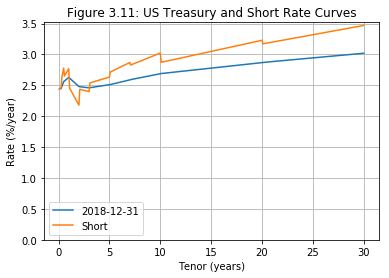

In [25]:
#Get most recent yearend US Treasury curve
#Interpolate it to monthly and compute a short
#rate curve based on that
#Plot both

lastday=qf.LastYearEnd()
seriesnames=['DGS1MO','DGS3MO','DGS6MO','DGS1',
             'DGS2','DGS3','DGS5','DGS7',
             'DGS10','DGS20','DGS30']
cdates,ratematrix=qf.GetFREDMatrix(seriesnames,startdate=lastday,enddate=lastday)
tenorsfromtsy=qf.TenorsFromNames(seriesnames)

#Get monthly interpolated curve and short rate curve
#InterpolateCurve is in frmbook_funcs
tenors,curvemonthly,shortrates=qf.InterpolateCurve(tenorsfromtsy,ratematrix[0])

plt.plot(tenors, curvemonthly, label=lastday)
plt.plot(tenors, shortrates, label='Short')
## Configure the graph
plt.title('Figure 3.11: US Treasury and Short Rate Curves')
plt.xlabel('Tenor (years)')
plt.ylabel('Rate (%/year)')
plt.ylim(0,max(curvemonthly)+.5)
plt.legend()
plt.grid(True)
plt.show;

### 3.8.1 Short Rate Models - General Framework ###
<a name="short_rate_models_general"></a>

A major class of term structure models is based on the assumption that implied short rates are Markovian, i.e. the probability distribution of $\{r(\tau,\tau), \tau\geq t\}$ is completely determined by the value of $r(t,t)$ (and not the path that was followed to $r(t,t)$). This is not necessarily true – another class of models called LIBOR market models are not Markovian. In this course we will not study LIBOR market models.

The Markov assumption seems to have first been made by [Oldrich Vasicek in 1977](https://pdfs.semanticscholar.org/8a82/a275d715119deb49f8f1cde4a675843e3f58.pdf). Vasicek pointed out that a continuous Markov process is a _diffusion process_, i.e. a process of the form \eqref{eq:sde_diffusion}. Vasicek further assumed that what we have called $Z(s,f)$ (the price $Z(s,f)$ of a "zero" starting at time $s$ in the future and maturing at \\$1 at time $f\geq s$) was only dependent on the assessment, at time $s$, of the short rate from time $s$ to time $f$.

The assessment of the short rate involves taking expectations. Let $R$ be the random variable giving the short rate forward from the starting time $s$, so
$$dR=\alpha(t,R)dt+\sigma(t,R)d\beta\label{eq:short_rate_diffusion}\tag{3.40}$$
as in \eqref{eq:sde_diffusion_function}, but with some symbols changed. As we noted above, a stochastic process like \eqref{eq:short_rate_diffusion} can be thought of as an algorithm that generates many random paths into the future. For our purposes the outcome space $\Omega$ is the set of all paths taken by the short rate $R$ from time $s$ to time $f$ generated by the process \eqref{eq:short_rate_diffusion}.

Let $\omega\in\Omega$ be such a path, and define
$$\overline{R}(\omega)=\frac{1}{f-s}\int_s^f{R_{\omega}(s)ds}\label{eq:short_rate_rbar}\tag{3.41}$$
$\overline{R}$ is a random variable that maps $\omega$ into $\mathbb{R}$ by averaging the value of the realized short rate over the path $\omega$. The integral on the right of \eqref{eq:short_rate_rbar} is deterministic given $\omega$.

We need to find the price $Z(s,f)$ of the zero maturing at \\$1 at time $f$; this is a nonlinear function of the rate. That introduces a risk adjustment. Vasicek shows (his equation 18) we can write:
$$Z(s,f)=\mathbb{E}_{s,\Omega}\bigl[exp\bigl(-(f-s)\overline{R}_{\omega}-Rsk(s,f,\omega)\bigr)\bigr]\tag{3.42}$$
The risk adjustment random variable depends on a deterministic function $q(x,y)$ as follows:
$$Rsk(s,f,\omega)=\frac{1}{2}\int_s^f{q^2(\tau,R_{\omega}(\tau))d\tau}-\int_s^f{q(\tau,R_{\omega}(\tau))d\beta_{\omega}}\label{eq:short_rate_risk_adjustment}\tag{3.43}$$

While \eqref{eq:short_rate_risk_adjustment} covers a wide range of models, it often suffices to assume that the function $q(x,y)$ is a constant, which we will do from now on. That collapses \eqref{eq:short_rate_risk_adjustment} into a simpler expression:
$$Rsk(s,f,\omega)=\frac{1}{2}q^2(f-s)-q\int_s^f{d\beta_{\omega}}$$
The first term is nonstochastic and the second term adds $q$ to the $\sigma$ function in \eqref{eq:short_rate_diffusion}. So under the assumption that $q$ is a constant, the risk adjustment can be taken into account by making suitable translations of $\alpha$ and $\sigma$ in \eqref{eq:short_rate_diffusion}, and we can assume
$$Z(s,f)=\mathbb{E}_{s,\Omega}\bigl[exp\bigl(-(f-s)\overline{R}_{\omega}\bigr)\bigr]\label{eq:vasicek_z_norisk}\tag{3.45}$$

### 3.8.2 Short Rate Models - Specific Framework ###

In an example, Vasicek further assumed that \eqref{eq:short_rate_diffusion} was an [Ornstein-Uhlenbeck process](#ornstein_uhlenbeck). This was reasonable, because &mdash; like a spring &mdash; interest rates and volatilities also have some kind of equilibrium value. If not, then the economy in which they occur is probably broken: a functioning economy can't have interest rates going to infinity – that’s hyperinflation and money would be worthless. There have been economies with hyperinflation and essentially worthless money, but they quickly stopped functioning altogether.

It used to be thought that a similar constraint was that nominal interest rates couldn’t go negative except in very short technical disruptions. But we've already seen in Figure 3.3 that isn't true; there can be sustained periods of negative nominal (or, as Figure 3.2 shows, real) rates. However it's generally thought that rates can't be _too_ negative for the reasons discussed at the beginning of this chapter. So as we'll see most modelers tried to put a zero lower bound on rates, or at least discourage them from going significantly below zero.

Vasicek’s specific model for the short rate R(t) was:
$$dR=\lambda(R_{\infty}-R)dt+\sigma d\beta\label{eq:vasicek}\tag{3.46}$$
That's an [Ornstein-Uhlenbeck process](#ornstein_uhlenbeck) like \eqref{eq:ornstein_uhlenbeck}. Here $R_{\infty}$ is the equilibrium position of the spring – a target short rate. As with other stochastic processes, we can think of \eqref{eq:vasicek} as an algorithm that steps through time increments of $dt$, starting at $t=0$ and generating $R(t+dt)$ once $R(t)$ is known.

Before running the algorithm, we need to choose $R(0)$, the current observable short rate. This could be an overnight [Fed Funds rate](https://www.newyorkfed.org/aboutthefed/fedpoint/fed15.html). We also need to choose $R_{\infty}$, which doesn’t have to be a constant – it can vary with time t as long as it’s deterministic and not stochastic as we step through time increments. Vasicek actually envisioned a constant $R_{\infty}$ – time-varying $R_{\infty}$ was introduced by [Hull & White in 1990](https://www.jstor.org/stable/2962116). $R_{\infty}$ can be the current implied short rate curve. We choose $\lambda$ (the spring stiffness) by observing how long it has taken rates to get back to their average historically, and $\sigma$, the volatility of shocks to the short rate also by historical observation.

The algorithm runs like this:
1. Set t=0 and decide on a time increment, maybe $dt=1/12$ for a month.
2. Generate a draw from a white noise (say standard normal) distribution. Plug it in as $d\beta$ to the RHS of \eqref{eq:vasicek}. Fill in the rest of the RHS of \eqref{eq:vasicek} using the value of $R(t)$ from the previous iteration, or from observation if $t=0$. That gives us $dr=R(t+dt)-R(t)$, and hence $R(t+dt)$.
3. Increment $t=t+dt$. Repeat step 2 until done (i.e. have generated 30 years). That is one path $\omega\in\Omega$, where $\Omega$ is the outcome space of all paths.
4. Generate a yield curve from the short curve: $y(t)=\frac{1}{t}\sum_{u=0}^t{R(u)\cdot dt}$. $y(t)$ is the $\overline{R}(\omega)$ (with $s=0$, $f=t$) in \eqref{eq:short_rate_rbar} for this process.

The process can be repeated as many times as you want to generate as many yield curves as you want. These yield curves can then be used in Monte Carlo simulations to price fixed income instruments.

Let’s try it. Using the December 29, 2017 yield curve and implied short rate curve shown above, we set $\lambda=1$ and $\sigma=.05$ because they generate interesting patterns and not because they are particularly realistic. Note that $\sigma$ is in monthly units in our example since $dt=1/12$. Or we could put $\sigma$ in annual terms and scale draws from $d\beta$ so they are month-ized, i.e. multiply the standard draws by $\sqrt{dt}$.

Figure 3.12 shows (each time it is run) a different path $\omega$ consisting of 360 monthly steps. The orange line is the implied short rate curve we inferred from the 2017-12-29 par curve (which is in blue). We should have used a zero curve, but this suffices for illustrative purposes. The green line is the result of running 360 random draws through the \eqref{eq:vasick} process, i.e a sample $R(\omega)$. The red line is the averaged values $\overline{R}(\omega)$ of the green line, giving a randomly drawn yield curve.

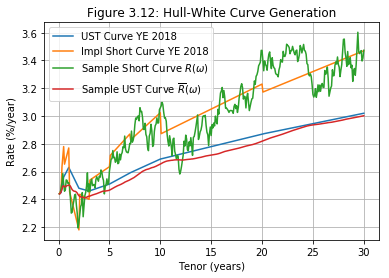

In [26]:
import random
#Plot an observed year-end Treasury curve;
#a short-rate curve based on that;
#a Hull-White randomly generated short-rate curve;
#and a yield curve integrating the Hull-White short curve

lastday=qf.LastYearEnd()
seriesnames=['DGS1MO','DGS3MO','DGS6MO','DGS1',
             'DGS2','DGS3','DGS5','DGS7',
             'DGS10','DGS20','DGS30']
cdates,ratematrix=qf.GetFREDMatrix(seriesnames,startdate=lastday,enddate=lastday)

tenorfromtsy=qf.TenorsFromNames(seriesnames)
#Get monhtly interpolated curve and short rate curve
tenors,curvemonthly,shortrates=qf.InterpolateCurve(tenorsfromtsy,ratematrix[0])

#Uncomment next line to get the same omega every time
#random.seed(3.14159265)
#set parameters for Ornstein-Uhlenbeck process
#xlambda is spring stiffness; sigma is volatility
xlambda=1
sigma=.05
randomwalk=[]
curvesample=[]
for i,rate in enumerate(shortrates):
    if i==0: # initialize
        randomwalk.append(shortrates[i])
        curvesample.append(randomwalk[i])
    else:
        deterministic=xlambda*(shortrates[i]-randomwalk[i-1])
        #multiply by delta-t
        deterministic*=(tenors[i]-tenors[i-1])
        stochastic=sigma*random.gauss(0,1)
        randomwalk.append(randomwalk[i-1]+deterministic+stochastic)
        #sample curve is average of short rate
        #random walk to this point
        cs=curvesample[i-1]*i
        cs+=randomwalk[i]
        cs/=(i+1)
        curvesample.append(cs)
        
#Plot the four curves      
plt.plot(tenors, curvemonthly, label='UST Curve YE '+lastday[:4])
plt.plot(tenors, shortrates, label='Impl Short Curve YE '+lastday[:4])
plt.plot(tenors, randomwalk, label='Sample Short Curve $R(\omega)$')
plt.plot(tenors, curvesample, label='Sample UST Curve $\overline{R}(\omega)$')
## Configure the graph
plt.title('Figure 3.12: Hull-White Curve Generation')
plt.xlabel('Tenor (years)')
plt.ylabel('Rate (%/year)')
plt.legend()
plt.grid(True)
plt.show;

Ten randomly generated curves $y(t)$ via the Hull-White model \eqref{eq:hull_white} with $\lambda=1$ are shown below in Figure 3.13 – one set with a low $\sigma$ and one with a higher $\sigma$. (The Hull-White model is like the Vasicek model, but with time-varying $R_{\infty}$.) This is a fairly tight spring. With a lower value of $\lambda$, a wider variety of curves would result – but then there would be a larger chance of negative rates.

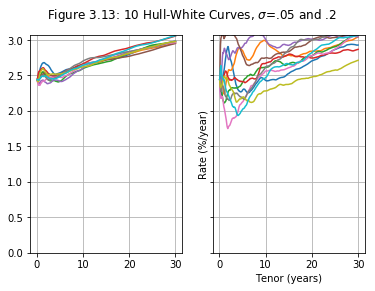

In [27]:
#Plot 10 Hull-White paths based on yearend US Treasury curve

lastday=qf.LastYearEnd()

seriesnames=['DGS1MO','DGS3MO','DGS6MO','DGS1',
             'DGS2','DGS3','DGS5','DGS7',
             'DGS10','DGS20','DGS30']
cdates,ratematrix=qf.GetFREDMatrix(seriesnames,startdate=lastday,enddate=lastday)
tenorsfromtsy=qf.TenorsFromNames(seriesnames)

#Get monhtly interpolated curve and short rate curve
tenors,curvemonthly,shortrates=qf.InterpolateCurve(tenorsfromtsy,ratematrix[0])

#do one graph with sigma=.05 and another
#with sigma=.2
#keep track of range
minrate,maxrate=0,0
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
fig.suptitle("Figure 3.13: 10 Hull-White Curves, $\sigma$=.05 and .2")
random.seed(3.14159265)

ax=ax1
for sigma in (.05,.2):
    #set parameters for Ornstein-Uhlenbeck process
    #xlambda is spring stiffness; sigma is volatility
    xlambda=1
    #generate and plot 10 sample curves
    for sample_number in range(10):
        randomwalk=[]
        curvesample=[]
        for i,rate in enumerate(shortrates):
            if i==0: # initialize
                randomwalk.append(shortrates[i])
                curvesample.append(randomwalk[i])
            else:
                deterministic=xlambda*(shortrates[i]-randomwalk[i-1])
                #multiply by delta-t
                deterministic*=(tenors[i]-tenors[i-1])
                stochastic=sigma*random.gauss(0,1)
                randomwalk.append(randomwalk[i-1]+deterministic+stochastic)
                #sample curve is average of short rate
                #random walk to this point
                cs=curvesample[i-1]*i
                cs+=randomwalk[i]
                cs/=(i+1)
                curvesample.append(cs)
        minrate=min(curvesample)
        maxrate=max(curvesample)
        ax.plot(tenors,curvesample)
    plt.xlabel('Tenor (years)')
    ax.grid(True)
    ax=ax2
## Configure the graph
plt.ylabel("Rate (%/year)")
plt.ylim(min(0,minrate),max(3,maxrate))
plt.show;

### 3.8.3 Expected Value of Vasicek Model ###

We can directly integrate the Vasicek process \eqref{eq:vasick} after a change of variable $S=e^{\lambda t}R$:
$$d(e^{−\lambda t}S(t))=\lambda(R_{\infty}−e^{−\lambda t}S(t)dt+\sigma d\beta$$
$$e^{−\lambda t}dS(t)=\lambda R_{\infty}dt+\sigma d\beta\tag{3.47}$$

Integrating the differential equation for $S$ and then shifting back to $R$ gives:
$$S(t)=S(0)+R_{\infty}(e^{\lambda t}−1)+\sigma\int_0^t{e^{\lambda x}d\beta(x)}$$
$$R(t)=e^{-\lambda t}R(0)+R_{\infty}(1-e^{-\lambda t})+\sigma e^{-\lambda t}\int_0^t{e^{\lambda x}d\beta(x)}\tag{3.48}$$

We have replicated more formally the process of forming the jagged green line in Figure 3.10. So the short rate can be broken into a nonstochastic part $R_N(t)$ that’s just a function of t (with no randomness) and a stochastic part (a random variable $R_S(t)$) that has zero mean but nonzero standard deviation:
$$R(t)=R_N(t)+R_S(t)$$
$$R_N(t)=e^{-\lambda t}R(0)+R_{\infty}(1-e^{-\lambda t})\label{eq:vasicek_nonstochastic}\tag{3.49a}$$
$$R_S(t)=\sigma e^{-\lambda t}\int_0^t{e^{\lambda x}d\beta(x)}\label{eq:vasicek_stochastic}\tag{3.49b}$$

Recall that by definition the rate $r(s,f)=-\frac{1}{f-s}ln(Z(s,f)$, so \eqref{eq:vasicek_z_norisk} can be rewritten as
$$r(0,T)=\frac{-1}{T}ln\bigl(\mathbb{E}\bigl[exp\bigl(-\int_0^T{(R_N(s)+R_S(s))ds}\bigr)\bigr]\bigr)$$
$$=\frac{1}{T}\int_0^T{R_N(s)ds}-\frac{1}{T}ln\bigl(\mathbb{E}\bigl[exp\bigl(-\int_0^T{R_S(s)ds}\bigr)\bigr]\bigr)=r_N(0,T)+r_S(0,T)\tag{3.50}$$

Evaluating the nonstochastic integral after plugging in \eqref{eq:vasicek_nonstochastic} is straightforward:
$$r_N(0,T)=\frac{1}{T}\int_0^T{R_N(s)ds}=\frac{1}{T}\int_0^T{\bigl(e^{-\lambda s}R(0)+R_{\infty}(1-e^{-\lambda s})\bigr)ds}$$
$$=R_{\infty}+\frac{(R(0)-R_{\infty})(1-e^{-\lambda T})}{\lambda T}\label{eq:vasicek_non_solution}\tag{3.51}$$

The stochastic part of the rate is of the form
$$r_S(0,T)=-\frac{1}{T}ln\bigl(\mathbb{E}\bigl[exp\bigl(-X\bigr)\bigr]\bigr)\label{eq:vasicek_stoch_rate}\tag{3.52}$$
where $X=\int_0^T{R_S(s)ds}$. With a change of order of integration we have
$$X=\int_0^T{R_S(s)ds}=\sigma\int_0^T{e^{-\lambda s}\int_0^s{e^{\lambda x}d\beta(x)}ds}=
\sigma\int_0^T{e^{\lambda x}\bigl(\int_x^T{e^{-\lambda s}ds}\bigr)d\beta(x)}$$
$$=\frac{\sigma}{\lambda}\int_0^T{\bigl(1-e^{-\lambda(T-x)}\bigr)d\beta(x)}
=\frac{\sigma}{\lambda}\int_0^T{\bigl(1-e^{-\lambda x}\bigr)d\beta(x)}\tag{3.53}$$
The last equality replaces $T-x$ with $x$ in the exponent since the order of integration doesn't matter; the $d\beta$ are mean-zero independent random draws.

If the increments $d\beta$ are independent and normally distributed, then by the Central Limit Theorem $X$ is normal. Note that if $Y$ is a normal random variable with mean $\mu$ and variance $v$, $\mathbb{E}[e^{-Y}]=\frac{1}{\sqrt{2\pi v}}\int_{-\infty}^{\infty}{e^{-x}e^{-\frac{(x-\mu)^2}{2v}}dx}=e^{-\mu+v/2}$. For $X$, the mean $\mu=0$ since each $\mathbb{E}[d\beta]=0$. So we can rewrite \eqref{eq:vasicek_stoch_rate} as
$$r_S(0,T)=-\frac{1}{T}ln\bigl(e^{\mathbb{E}[X^2]/2}\bigr)\label{eq:vasicek_stoch_rewrite}\tag{3.54}
=-\frac{1}{2T}\mathbb{E}[X^2]$$

The independence of the $d\beta$ means that when squaring $X$, terms that look like $d\beta(x)d\beta(y)$ where $x\neq y$ have expected value zero. So (by It&ocirc; isometry) we can write:
$$\mathbb{E}[X^2]=\frac{\sigma^2}{\lambda^2}\int_0^T{\bigl(1-e^{-\lambda x}\bigr)d\beta(x)}
\int_0^T{\bigl(1-e^{-\lambda y}\bigr)d\beta(y)}
=\frac{\sigma^2}{\lambda^2}\int_0^T{\bigl(1-e^{-\lambda x}\bigr)^2d\beta(x)^2}
=\frac{\sigma^2}{\lambda^2}\int_0^T{\bigl(1-e^{-\lambda x}\bigr)^2dx}$$
$$=\frac{\sigma^2}{2\lambda^3}\bigl(2\lambda T+4e^{-\lambda T}-e^{-2\lambda T}-3\bigr)\tag{3.55}$$

Combining with \eqref{eq:vasicek_stoch_rewrite} gives
$$r_S(0,T)=-\frac{1}{2T}\mathbb{E}[X^2]=-\frac{\sigma^2}{4T\lambda^3}\bigl(2\lambda T+4e^{-\lambda T}-e^{-2\lambda T}-3\bigr)\label{eq:vasicek_stoch_solution}\tag{3.56}$$

Combining \eqref{eq:vasicek_non_solution} and \eqref{eq:vasicek_stoch_solution}, the overall expected rate curve is given by[$^{11}$](#three_footnotes)
$$r(0,T)=R_{\infty}+\frac{(R(0)-R_{\infty})(1-e^{-\lambda T})}{\lambda T}-
\frac{\sigma^2}{4T\lambda^3}\bigl(2\lambda T+4e^{-\lambda T}-e^{-2\lambda T}-3\bigr)\tag{3.57}$$

### 3.8.4 Other Short Rate Models ###
<a name='other_short_rate_models'></a>

A large number of short rate models were developed over the 25 years following Vasicek. These one-factor models have a single source of uncertainty, a $d\beta$ term that, along with the rest of the model, causes the short rate to have a desired distribution of outcomes. Some of these models were extended to two- (or higher) factor models with multiple sources of uncertainty, but one factor usually provides most of the power of this class of models. The short rate paths resulting from these models can be aggregated into yield curves using the process outlined [above](#short_rate_models_general). The resulting distribution of yield curves can be used to value bonds and bond derivatives, in turn giving realistic probability distributions of their prices.

[Rendleman and Bartter 1980](https://www.jstor.org/stable/2979016) used a different approach and took what most now believe was a step backward by using a process similar to the lognormal process that [Louis Bachelier](#bachelier) proposed in 1900 for equity prices:
$$dr=r\mu dt+t\sigma d\beta\label{eq:rendleman_bartter}\tag{3.60}$$
However this process can drift to large negative or large positive short rates. This is inconsistent with empirical observation and economic sense.

[Cox, Ingersoll and Ross 1985](https://www.jstor.org/stable/1911242) combined the mean reversion of an Ohrnstein-Uhlenbeck process with an adjustment for the fact that the volatility of changes in rates is larger as rates get larger. This model can be obtained by assuming that the short rate $r=s^2$, enforcing positive short rates. $s$ in turn is assumed to follow the Vasicek process \eqref{eq:vasick} with long-term rate $R_{\infty}=0$. Applying It&ocirc;’s Lemma to $r=s^2$ and $ds=-a s\cdot dt-\sigma d\beta$ gives a process of the form
$$dr=c(d-r)dt+\sigma\sqrt{r}d\beta\tag{3.61}$$
The square-root adjustment in the volatility term appears to be supported by empirical patterns.

The [Ho and Lee 1986](https://www.jstor.org/stable/2328161) model allows straightforward fitting to the current curve.
$$dr=\alpha(t)dt+\sigma d\beta\tag{3.62}$$
$\alpha(t)$ is constructed so that $r$ will match the current short rate curve at the current time and then drift from there.

As we've noted, the [Hull and White 1990](https://www.jstor.org/stable/2962116) model has the same structure as Vasicek's original model, but replaces the constant $R_{\infty}$ with a time-varying &mdash; but nonstochastic &mdash; $R_{target}(t)$:
$$dr=\lambda(R_{target}(t)-r)dt+\sigma d\beta\label{eq:hull_white}\tag{3.63}$$
This is actually what we used in Figures 3.12 and 3.13.

[Black, Derman and Toy 1990](https://www.jstor.org/stable/4479294) combine a lognormal process with curve fitting and an It&ocirc; volatility adjustment. They further incorporate data from the interest rate derivatives market to fit rate volatilities as well as short rate levels, so $\sigma$ is also a function of time:
$$dr=(R_{target}(t)+\sigma^2/2)rdt+\sigma(t)rd\beta\tag{3.64}$$

A popular model is [Black and Karasinski 1991](https://www.jstor.org/stable/4479456). They force rates to be non-negative by substituting the logarithm of short rates for short rates themselves in Vasicek’s model \eqref{eq:vasick}. They further fit both current rates and volatilities into the parameters $a$, $b$ and $\sigma$. These parameters are nonstochastic but time-varying so they can fit observed market data:
$$dln(r)=(b(t)-a(t)ln(r))dt+\sigma(t)d\beta\tag{3.65}$$

# Chapter 3 Footnotes #
<a name="three_footnotes"></a>

$^1$Not quite - there may be slightly different default-free borrowing and lending rates. To keep things simple we'll assume they're the same.
<br><br>
$^2$Actually the relationship between the rates is: (1+nominal)=(1+real)(1+inflation). This is called the Fisher equation after economist Irving Fisher. Over small periods of time, it's pretty close to additive.
<br><br>
$^3$At this writing, regulators in a number of jurisdictions around the world have indicated that they would like to see LIBOR phased out in favor of other benchmarks. In the US, there is a move to replace LIBOR with [SOFR, the Secured Overnight Financing Rate](https://apps.newyorkfed.org/markets/autorates/sofr)
<br><br>
$^4$While _internal rate of return_ is a well-defined term, _yield_ is not: there are many different types of yield. Generally if we just use the term yield without further elaboration, we mean internal rate of return.
<br><br>
$^5$There isn't any widely-agreed definition of the maturity ranges that comprise short, intermediate and long. For example, we consider the boundary between short and intermediate to be two years, but some authors say the boundary between short and intermediate is at three years.
<br><br>
$^6$The all-time 1-10 steepness was 3.53% on April 5, 2010. By the end of 2011 the 1-10 steepness had fallen to 1.77%.
<br><br>
$^7$Interest rates have been around for a long time: "Old Sumerian documents, circa 3000 B.C., reveal... loans of grain by volume and loans of metal by weight. Often these loans carried interest." Sidney Homer and Richard Sylla, "A History of Interest Rates," Fourth Edition (Wiley, 2005). P. 17.
<br><br>
$^8$Our definition of an s-forward curve is the set of $r(s,f)$ where $f\geq s$. Another convention (which we will not use) is that the x-forward curve is the set of $r(s,s+x)$ for some fixed term x.
<br><br>
$^9$Protter, Phillip. Stochastic Integration and Differential Equations, $2^{nd}$ Edition, Version 2.1. Springer, 2005. p. 81. Protter, along with most other stochastic processes texts, presents an integral version of "Itô’s formula." Taking derivatives of the integral formula produces the form shown in \eqref{eq:itos_lemma}.
<br><br>
$^{10}$Protter, Ibid, p. 98 (exercise 27).
<br><br>
$^{11}$With a change of notation, this is the same as Vasicek's (27) and (28) after removing the risk adjustment $\frac{q\sigma}{\lambda^2}(1-e^{-\lambda T}-\lambda T)$ 